![Status: Complete](https://img.shields.io/badge/status-complete-brightgreen)
![Python](https://img.shields.io/badge/python-3.10-blue)
![Coverage](https://img.shields.io/badge/coverage-80%25-yellow)
![License](https://img.shields.io/badge/license-MIT-green)

<a id="table-of-contents"></a>
# 📖 Prediction

[🧪 Data Setup](#data-setup)
- [📥 Load Dataset](#load-dataset)
- [📊 Data Characteristics Dictionary](#data-characteristics-dictionary)  
- [🔎 EDA](#eda)  
- [📐 Linearity - LR Assumption](#linearity-check)
- [📉 Homoscedasticity - LR Assumption](#homoscedasticity)
- [📊 Normality of Residuals - LR Assumption](#normality-check)
- [🔗 Multicollinearity - LR Assumption](#multicollinearity)
- [🔄 Independence of Residuals - LR Assumption](#independence)
- [🛠️ Feature Engineering](#feature-engineering)
- [🧹 Preprocessing](#preprocessing)

[🧪 Baseline Model](#baseline-model)
- [🆚 Predicted vs Actual](#pred-vs-actual)
- [🌀 Residual Plot](#residual-plot)
- [📏 Evaluation Metrics](#evaluation-metrics)
- [🧮 Update Best Model Info](#update-best-model)

[🧰 Algorithms](#algorithms)
- [⚙️ Linear Regression](#linear-regression)
- [🧊 Ridge Regression](#ridge-regression)
- [🔥 Lasso Regression](#lasso-regression)
- [🧃 ElasticNet](#elasticnet)
- [🌳 Decision Trees](#decision-trees)
- [🪵 Random Forests](#random-forest)
- [🚀 Gradient Boosting (XGBoost, LightGBM)](#gradient-boosting)
- [⚙️ Support Vector Machines (SVR)](#svm)
- [🧠 K-Nearest Neighbors (KNN)](#knn)
- [🤖 Neural Networks (MLP Regressor)](#neural-networks)

[📊 Model Selection](#model-exploration)  
- [🧠 Recommend Models](#recommend-models)  
- [📈 Model Comparison](#model-comparison)  
- [📊 Feature Importance](#feature-importance)  
- [🧬 SHAP Values](#shap-values)

[🎯 Fine Tune](#hyperparameter-tuning)
- [🧪 Feature Selection – RFE](#feature-selection-rfe)  
- [🧪 Feature Selection – RFE + SHAP](#feature-selection-rfe-shap)  
- [🧪 Grid Search](#gridsearch-linear)
- [🎲 Randomized Search](#randomsearch-regularized)
  
[📦 Ensemble Methods](#ensemble-methods)
- [🪵 Bagging (Random Forest Regressor)](#bagging)
- [🚀 Boosting](#boosting)
- [🧠 Stacking (Meta-modeling)](#stacking)

[📦 Export & Deployment](#export-deploy)
- [🧊 Pickling](#pickling)
- [📊 Monitoring Hooks](#monitoring-hooks)

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="data-setup"></a>
# 🧪 Data Setup

<a id="load-dataset"></a>
#### 📥 Load Dataset

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<details><summary><strong>📖 Click to Expand</strong></summary>

- **MedInc**: Median income in block group  
- **HouseAge**: Median house age in block group  
- **AveRooms**: Average number of rooms per household  
- **AveBedrms**: Average number of bedrooms per household  
- **Population**: Block group population  
- **AveOccup**: Average number of household members  
- **Latitude**: Block group latitude  
- **Longitude**: Block group longitude  
- **Target**: Median house value (in $100,000s)


</details>


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
df = fetch_california_housing(as_frame=True).frame
target_col = 'MedHouseVal'

# Preview dataset
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

<a id="data-characteristics-dictionary"></a>
<h4>📊 Data Characteristics Dictionary</h4>

<details><summary><strong>📖 Click to Expand</strong></summary> <p>This section initializes the <strong>data characteristics dictionary</strong>, which will store various metadata about the dataset, including details about the target variable, features, data size, and relationships between features and the target.</p> <p>The dictionary contains the following key sections:</p> <ol> <li><strong>🎯 Target Variable</strong>: <ul> <li><strong>Distribution</strong>: Specifies whether the target variable has a <strong>normal</strong> or <strong>skewed</strong> distribution.</li> <li><strong>Outliers</strong>: Flag indicating if outliers are detected in the target variable (True or False).</li> </ul> </li> <li><strong>🔧 Features</strong>: <ul> <li><strong>Type</strong>: A dictionary specifying whether each feature is <strong>categorical</strong> or <strong>continuous</strong>.</li> <li><strong>Correlation</strong>: A dictionary indicating whether each feature is significantly correlated with the target variable (e.g., {"AveRooms": True, "HouseAge": False}).</li> <li><strong>Multicollinearity</strong>: Flag indicating whether there is high multicollinearity among features (True or False).</li> <li><strong>Outliers</strong>: A dictionary showing the number of outliers detected in each feature (e.g., {"AveRooms": 3, "HouseAge": 0}).</li> <li><strong>Missing Data</strong>: A dictionary indicating the percentage of missing data for each feature (e.g., {"AveRooms": 5.0, "Population": 2.5}).</li> </ul> </li> <li><strong>📈 Data Size</strong>: <ul> <li><strong>Samples</strong>: The number of rows (samples) in the dataset.</li> <li><strong>Features</strong>: The number of columns (features) in the dataset.</li> </ul> </li> <li><strong>🔍 Relationships</strong>: <ul> <li><strong>Linear Relationships</strong>: A dictionary that flags features with significant linear relationships (Pearson correlation > 0.7) with the target variable.</li> <li><strong>Non-Linear Relationships</strong>: A dictionary that flags features with non-linear relationships with the target variable.</li> </ul> </li> </ol> <p>This dictionary will be updated dynamically as we analyze the dataset. It serves as a <strong>summary of key dataset properties</strong> to guide further analysis and model selection decisions.</p> </details>

In [3]:
# Initialize the data characteristics dictionary for prediction
data_characteristics = {
    "target_variable": {
        "distribution": None,  # Possible values: "normal", "skewed"
        "outliers": None  # Possible values: True (outliers detected in target variable), False (no outliers in target variable)
    },
    "features": {
        "type": None,  # Dictionary with feature names as keys and types as values ("categorical", "continuous")
        "correlation": None,  # Dictionary with feature names as keys and boolean values indicating whether they are significantly correlated with target (e.g., {"AveRooms": True, "HouseAge": False})
        "multicollinearity": None,  # Possible values: True (high multicollinearity detected), False (no multicollinearity)
        "outliers": None,  # Dictionary with feature names as keys and the number of outliers as values (e.g., {"AveRooms": 3, "HouseAge": 0})
        "missing_data": None  # Dictionary with feature names as keys and the percentage of missing data as values (e.g., {"AveRooms": 5.0, "Population": 2.5})
    },
    "data_size": {
        "samples": None,  # Number of rows (samples) in the dataset
        "features": None  # Number of columns (features) in the dataset
    },
    "relationships": {
        "feature_target_linear_relationships": {
            # Example: "AveRooms": True means there is a linear relationship between the feature 'AveRooms' and the target variable
        },
        "feature_target_non_linear_relationships": {
            # Example: "HouseAge": True means there is a non-linear relationship between the feature 'HouseAge' and the target variable
        }
    }
}

<a id="eda"></a>
#### 🔎 EDA

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Assuming df is your dataset and target_col is your target column
# For example: target_col = 'MedHouseVal'

# 1. Populate Target Variable Characteristics
# ===========================================
# Distribution check (Target)
target_dist = df[target_col].describe()
if df[target_col].skew() > 1:
    data_characteristics["target_variable"]["distribution"] = "skewed"
elif df[target_col].skew() < -1:
    data_characteristics["target_variable"]["distribution"] = "skewed"
else:
    data_characteristics["target_variable"]["distribution"] = "normal"

# Check for outliers in the Target
z_scores_target = np.abs(stats.zscore(df[target_col]))
outliers_target = np.where(z_scores_target > 3)
data_characteristics["target_variable"]["outliers"] = len(outliers_target[0]) > 0  # True if outliers are present

# 2. Populate Features Characteristics
# ====================================
# Initialize dictionaries for features
feature_types = {}
feature_correlations = {}
outliers_features = {}
missing_data_features = {}

# Feature Types and Correlations
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical feature
        feature_types[col] = "categorical"
        # Encoding categorical variables
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:  # Continuous feature
        feature_types[col] = "continuous"
    
    # Correlation with the target (Pearson)
    if col != target_col:  # Don't check correlation for the target column itself
        corr_value = df[target_col].corr(df[col])
        feature_correlations[col] = abs(corr_value) > 0.3  # Flag if correlation is significant

    # Outliers detection (Z-score method)
    z_scores_feature = np.abs(stats.zscore(df[col]))
    feature_outliers = np.where(z_scores_feature > 3)  # Points with Z-score > 3 are outliers
    outliers_features[col] = len(feature_outliers[0])  # Store the number of outliers in the feature
    
    # Missing data calculation
    missing_data = df[col].isnull().sum() / len(df) * 100
    if missing_data > 0:
        missing_data_features[col] = missing_data  # Store percentage of missing data for each feature

# Update the dictionary with feature-related information
data_characteristics["features"]["type"] = feature_types
data_characteristics["features"]["correlation"] = feature_correlations
data_characteristics["features"]["outliers"] = outliers_features
data_characteristics["features"]["missing_data"] = missing_data_features

# 3. Check for Multicollinearity
# =======================================
correlation_matrix = df.corr()
multicollinearity_flag = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            multicollinearity_flag = True
            break
data_characteristics["features"]["multicollinearity"] = multicollinearity_flag

# 4. Populate Data Size Characteristics
# ====================================
data_characteristics["data_size"]["samples"] = df.shape[0]
data_characteristics["data_size"]["features"] = df.shape[1]

# 5. Populate Relationships between Features and Target
# =======================================================
linear_relationships = {}
non_linear_relationships = {}
for col in df.columns:
    if col != target_col:
        # Linear relationship check (Pearson correlation threshold of 0.7)
        corr_value = df[target_col].corr(df[col])
        if abs(corr_value) >= 0.7:
            linear_relationships[col] = True
            non_linear_relationships[col] = False
        else:
            linear_relationships[col] = False
            non_linear_relationships[col] = True

# Update the dictionary with the relationships
data_characteristics["relationships"]["feature_target_linear_relationships"] = linear_relationships
data_characteristics["relationships"]["feature_target_non_linear_relationships"] = non_linear_relationships



In [5]:
from pprint import pprint
pprint(data_characteristics)

{'data_size': {'features': 9, 'samples': 20640},
 'features': {'correlation': {'AveBedrms': False,
                              'AveOccup': False,
                              'AveRooms': False,
                              'HouseAge': False,
                              'Latitude': False,
                              'Longitude': False,
                              'MedInc': True,
                              'Population': False},
              'missing_data': {},
              'multicollinearity': True,
              'outliers': {'AveBedrms': 145,
                           'AveOccup': 8,
                           'AveRooms': 133,
                           'HouseAge': 0,
                           'Latitude': 0,
                           'Longitude': 0,
                           'MedHouseVal': 0,
                           'MedInc': 345,
                           'Population': 342},
              'type': {'AveBedrms': 'continuous',
                       'AveOccup': 'cont

<a id="linearity-check"></a>
#### 📐 Linearity - LR Assumption


<details><summary><strong>📖 Click to Expand</strong></summary>

- The **linearity assumption** states that the relationship between each predictor and the outcome is linear.
- Violations mean the model may underfit or misestimate relationships.
- A common diagnostic is a **scatter plot of predicted values vs residuals** — if the pattern is random (no curve), linearity holds.
- You can also use **partial regression plots** or **added variable plots** to assess individual feature relationships.

</details>


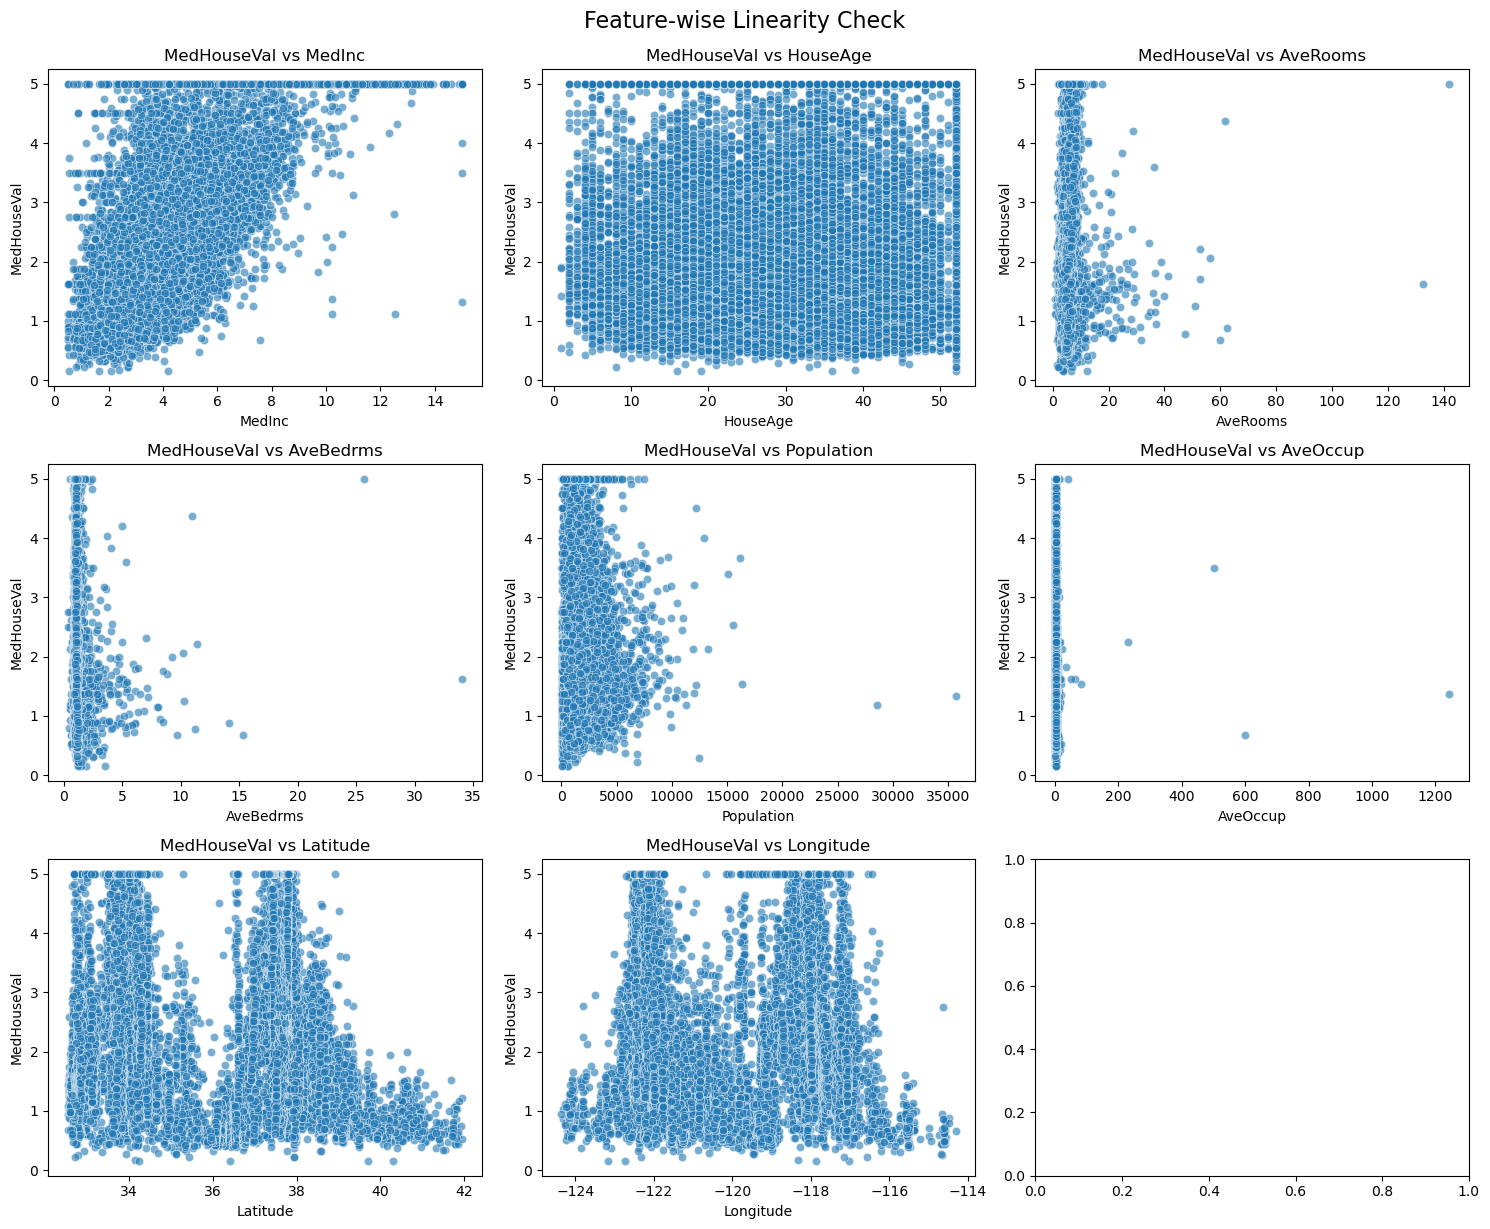

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define X and y using target_col
X = df.drop(columns=[target_col])
y = df[target_col]

# Plot each feature vs target
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12));
axes = axes.flatten();

for idx, col in enumerate(X.columns):
    sns.scatterplot(x=df[col], y=y, ax=axes[idx], alpha=0.6);
    axes[idx].set_title(f'{target_col} vs {col}');
    axes[idx].set_xlabel(col);
    axes[idx].set_ylabel(target_col);

plt.tight_layout();
plt.suptitle('Feature-wise Linearity Check', fontsize=16, y=1.02);
plt.show();

<a id="homoscedasticity"></a>
#### 📉 Homoscedasticity - LR Assumption

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Homoscedasticity** means residuals have constant variance across all levels of predicted values.
- If variance increases or decreases with prediction size, you have **heteroscedasticity**.
- This violates OLS assumptions and leads to inefficient estimates.
- To detect it, plot **residuals vs predicted values** after model fit.  
  A fan or cone shape indicates heteroscedasticity.

</details>


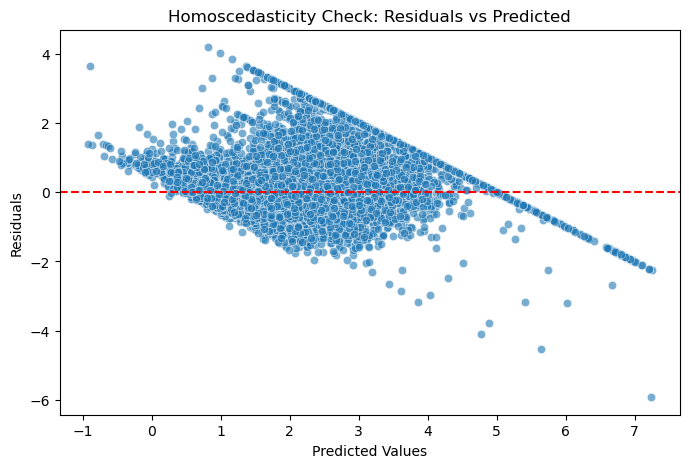

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Redefine X and y in case not done yet
X = df.drop(columns=[target_col])
y = df[target_col]

# Split and fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get residuals
y_pred = lr.predict(X_train)
residuals = y_train - y_pred

# Plot residuals vs predicted
plt.figure(figsize=(8, 5));
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6);
plt.axhline(0, linestyle='--', color='red');
plt.xlabel("Predicted Values");
plt.ylabel("Residuals");
plt.title("Homoscedasticity Check: Residuals vs Predicted");
plt.show();


<a id="normality-check"></a>
#### 📊 Normality of Residuals - LR Assumption

<details><summary><strong>📖 Click to Expand</strong></summary>

- This assumption says that residuals (errors) should be **normally distributed**.
- It’s especially important when constructing **confidence intervals** or conducting **hypothesis tests** on coefficients.
- While model fit may still work with non-normal residuals, statistical inference will be less valid.
- We check this using:
  - A **histogram** or **KDE plot** of residuals
  - A **Q-Q plot** to compare against a theoretical normal distribution

</details>


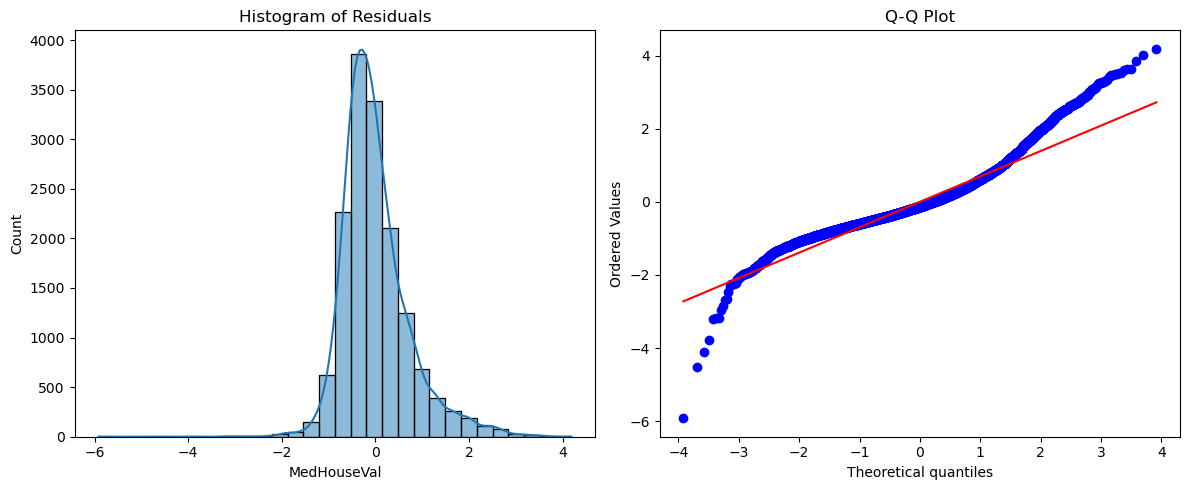

In [8]:
import scipy.stats as stats

# Residuals already computed as: residuals = y_train - y_pred

# Plot histogram + KDE of residuals
plt.figure(figsize=(12, 5));

plt.subplot(1, 2, 1);
sns.histplot(residuals, kde=True, bins=30);
plt.title("Histogram of Residuals");

# Q-Q plot
plt.subplot(1, 2, 2);
stats.probplot(residuals, dist="norm", plot=plt);
plt.title("Q-Q Plot");

plt.tight_layout();
plt.show();


<a id="multicollinearity"></a>
#### 🔗 Multicollinearity - LR Assumption

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Multicollinearity** refers to high correlation between predictor variables.
- It doesn't affect predictions but **destabilizes coefficient estimates**, making interpretation unreliable.
- Common detection methods:
  - **Variance Inflation Factor (VIF)**: Values > 5 (or 10) signal multicollinearity
  - **Correlation matrix**: For quick pairwise checks

</details>


In [9]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Compute VIF for each feature
X_with_const = sm.add_constant(X)  # statsmodels needs constant for intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]

vif_data.sort_values("VIF", ascending=False)


Feature       VIF
6    Latitude  9.297624
7   Longitude  8.962263
2    AveRooms  8.342786
3   AveBedrms  6.994995
0      MedInc  2.501295
1    HouseAge  1.241254
4  Population  1.138125
5    AveOccup  1.008324

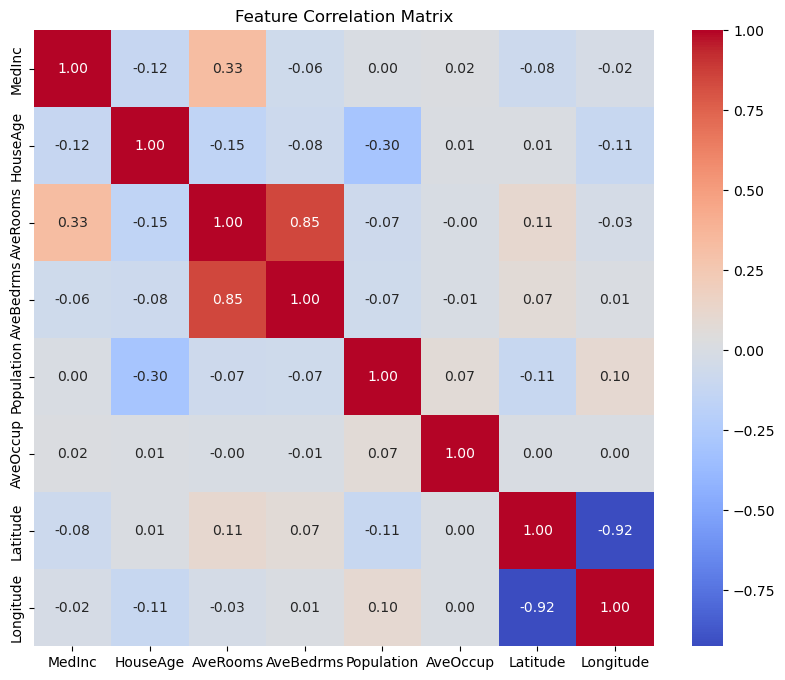

In [10]:
corr = df[X.columns].corr()
plt.figure(figsize=(10, 8));
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm");
plt.title("Feature Correlation Matrix");
plt.show();


In [11]:
# Drop features with high VIF (e.g., > 5)
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
X = X.drop(columns=high_vif_features)

<a id="independence"></a>
#### 🔄 Independence of Residuals (optional)

<details><summary><strong>📖 Click to Expand</strong></summary>

- The **independence assumption** means that residuals should not be correlated with each other.
- This mainly applies to **time series** or **clustered data** — it's usually not a concern for cross-sectional datasets like California Housing.
- If applicable, test with:
  - **Durbin-Watson test** (values close to 2 indicate no autocorrelation)
  - **Plot residuals over observation index** to visually inspect patterns

</details>


In [12]:
from statsmodels.stats.stattools import durbin_watson

# Run Durbin-Watson test on residuals
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

# Simple interpretation for business context
if 1.5 <= dw_stat <= 2.5:
    print("✅ Residuals appear to be independent — no patterns over observations.")
else:
    print("⚠️ Residuals may not be independent — investigate possible autocorrelation.")

# Rule of thumb:
# ~2.0  → No autocorrelation
# <1.5 or >2.5 → Possible autocorrelation

Durbin-Watson statistic: 1.963
✅ Residuals appear to be independent — no patterns over observations.


<a id="feature-engineering"></a>
#### 🛠️ Feature Engineering

<details><summary><strong>📖 Click to Expand</strong></summary>

##### Why engineer features?

- Raw features may not capture real-world relationships well.  
- Ratios, interactions, or log transforms can reveal hidden patterns.  
- Good feature engineering often matters more than model choice.

</details>

- *Ommitted Here*

<details><summary><strong>📖 Click to Expand - Scaling</strong></summary>

##### Why scale features?

- Many models (like regression, SVM, KNN) assume features are on similar scales.  
- Scaling avoids one large-valued feature dominating others.  
- It's essential for gradient-based optimization and distance-based models.

</details>

In [13]:
# from sklearn.preprocessing import StandardScaler

# Initialize the scaler
# scaler = StandardScaler()

# Fit on training data and transform
# X_scaled = scaler.fit_transform(X)

# If you want a DataFrame back:
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


In [14]:
# Example: create ratio or interaction features
# df["RoomsPerPerson"] = df["AveRooms"] / (df["Population"] + 1)
# df["BedToRoomRatio"] = df["AveBedrms"] / (df["AveRooms"] + 1)

# Always inspect new features:
# df[["RoomsPerPerson", "BedToRoomRatio"]].describe()


<a id="preprocessing"></a>
#### 🧹 Preprocessing

<details><summary><strong>📖 Click to Expand</strong></summary>

##### Why split the data?

- We need a separate test set to evaluate real-world performance.  
- Training on all data gives over-optimistic results.  
- Splitting ensures fair evaluation and prevents data leakage.

</details>


In [15]:
#### ✂️ Train-Test Split
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print("X_train: \n", X_train)
print("X_test: \n", X_test)
print("y_train: \n", y_train)
print("y_test: \n", y_test)

X_train: 
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   
...       ...       ...       ...        ...         ...       ...       ...   
11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   

       Longitude  
14196    

[Back to the top](#table-of-contents)
___


<a id="baseline-model"></a>
# 🧪 Baseline Model

🧠 Why Track `best_model_info`?

In real-world pipelines, it's critical to:
- Compare models not just by accuracy, but a full suite of metrics.
- Store the actual model object, hyperparameters, and diagnostics in one place.
- Ensure only the **best-performing** model (based on a chosen metrics) is promoted forward.

In [17]:
import numpy as np

# Initialize Central tracker dictionary to track best model details upon iterations
best_model_info = {
    "name": None,
    "model": None,
    "metrics": {
        "train": {
            "r2": -np.inf,  # R² (higher is better)
            "adjusted_r2": -np.inf,  # Adjusted R² (higher is better)
            "mape": np.inf,  # Mean Absolute Percentage Error (lower is better)
            "rmse": np.inf,  # Root Mean Squared Error (lower is better)
            "mse": np.inf,  # Mean Squared Error (lower is better)
            "mae": np.inf,  # Mean Absolute Error (lower is better)
        },
        "test": {
            "r2": -np.inf,
            "adjusted_r2": -np.inf,
            "mape": np.inf,
            "rmse": np.inf,
            "mse": np.inf,
            "mae": np.inf,
        }
    },
    "hyperparameters": None
}

# Dictionary to store all model performance results for comparison
model_results = {}


In [18]:
# Metric to decide which model is "best"
# Common choices (ranked by practical usage):
# 1. "r2"          → R² score (higher is better, reflects model fit)
# When to use: Use when you want to understand how well the model explains the variance in the target variable.
# Example: Predicting house prices where you want to know how well the features explain the price variance.

# 2. "adjusted_r2" → Adjusted R² (corrects R² for number of predictors in model)
# When to use: When you have many predictors and want to compare models while accounting for model complexity.
# Example: Real estate pricing models where you have multiple features (square footage, neighborhood, etc.).

# 3. "mape"        → Mean Absolute Percentage Error (lower is better, interpretable as % error)
# When to use: When you need a metric that expresses errors as a percentage, useful in business applications.
# Example: Forecasting sales where a 5% error is meaningful for decision-makers.

# 4. "rmse"        → Root Mean Squared Error (lower is better, penalizes large errors)
# When to use: When large errors are costly and need to be penalized more heavily than small errors.
# Example: Energy consumption forecasting, where large deviations are more problematic than small ones.

# 5. "mse"         → Mean Squared Error (lower is better, penalizes large errors)
# When to use: Similar to RMSE but less interpretable. Use when you want to focus on reducing all errors.
# Example: Stock price prediction where any large error is undesirable.

# 6. "mae"         → Mean Absolute Error (lower is better, easier to interpret)
# When to use: When you need an error metric in the same units as the target and want something easy to understand.
# Example: Predicting monthly household spending where the error needs to be understood in the same unit (e.g., dollars).

# Success metric used to select the best model
success_metric = "r2"  # or "rmse", depending on your goals
# success_split = "test"  # "train" or "test"


In [19]:
from sklearn.dummy import DummyRegressor

# Fit a dummy regressor as a baseline (predicting the mean)
dummy_regressor = DummyRegressor(strategy="mean")  # You can also try "median"
dummy_regressor.fit(X_train, y_train)


DummyRegressor()

In [20]:
# Predict on both train and test
y_train_pred = dummy_regressor.predict(X_train)
y_test_pred = dummy_regressor.predict(X_test)

residuals_test = y_test - y_test_pred
residuals_train = y_train - y_train_pred

<a id="pred-vs-actual"></a>
#### 🆚 Predicted vs Actual

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predicted_vs_actual(y_true, y_pred, title="Predicted vs Actual", data_type="Test Data"):
    """
    Plots the predicted values vs the actual values.
    
    Parameters:
    y_true : array-like
        Actual target values.
    y_pred : array-like
        Predicted target values.
    title : str
        Title of the plot (default is "Predicted vs Actual").
    data_type : str
        Label for the dataset type (default is "Test Data").
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot for actual vs predicted values
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, label=f"{data_type} Predictions")
    
    # Plot labels and title
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.title(title, fontsize=14)
    
    # Add a legend
    plt.legend(loc="upper left", fontsize=10)
    
    # Add gridlines for better visualization
    plt.grid(True)
    
    # Tight layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()


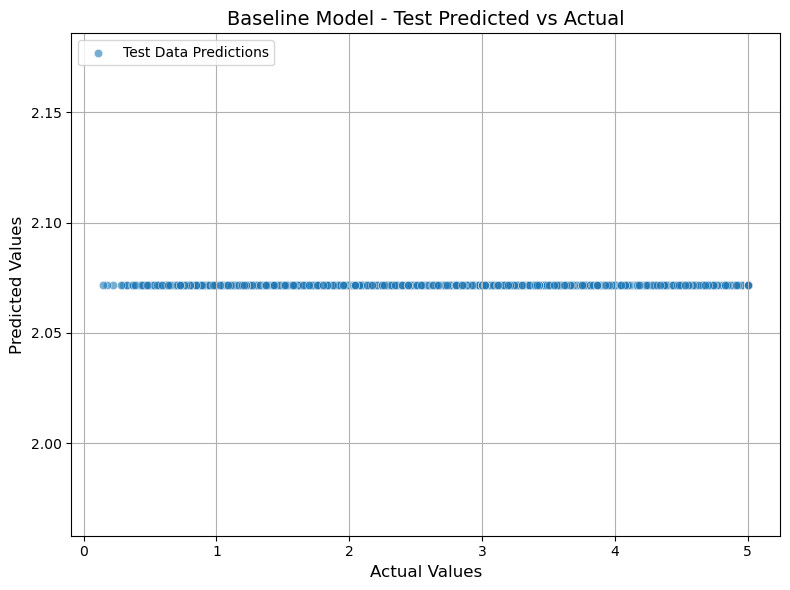

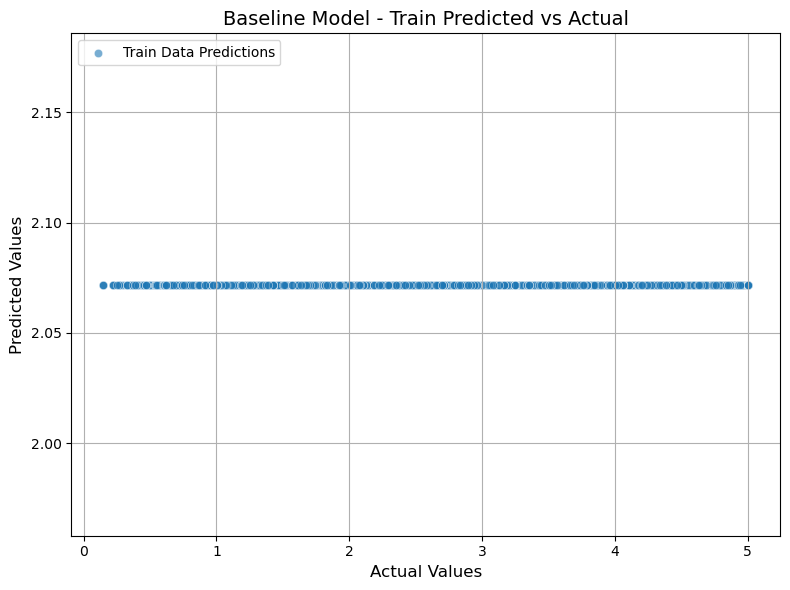

In [22]:
plot_predicted_vs_actual(y_test, y_test_pred, title="Baseline Model - Test Predicted vs Actual", data_type="Test Data")
plot_predicted_vs_actual(y_train, y_train_pred, title="Baseline Model - Train Predicted vs Actual", data_type="Train Data")

<a id="residual-plot"></a>
#### 🌀 Residual Plot
<a id="qq-plot"></a>
And 📈 QQ Plot

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_residuals_vs_predicted(y_true, y_pred, label="Data", plot_qq=True):
    """
    Plots residuals vs predicted values and optionally a Q-Q plot of residuals.
    
    Parameters:
    y_true : array-like
        Actual target values.
    y_pred : array-like
        Predicted target values.
    label : str
        Label for the plot (e.g., "Train Data", "Test Data").
    plot_qq : bool
        Whether to plot the Q-Q plot of residuals (default is True).
    """
    # Calculate residuals
    residuals = y_true - y_pred
    
    # Plot: Residuals vs Predicted
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Predicted - {label} (Homoscedasticity Check)")
    plt.tight_layout()
    plt.show()

    # Optionally, Q-Q plot of residuals
    if plot_qq:
        plt.figure(figsize=(6, 6))
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot of Residuals - {label}")
        plt.tight_layout()
        plt.show()


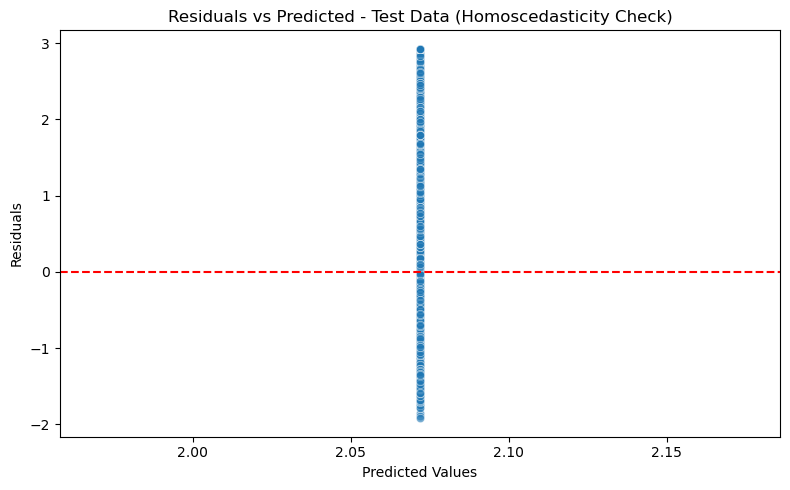

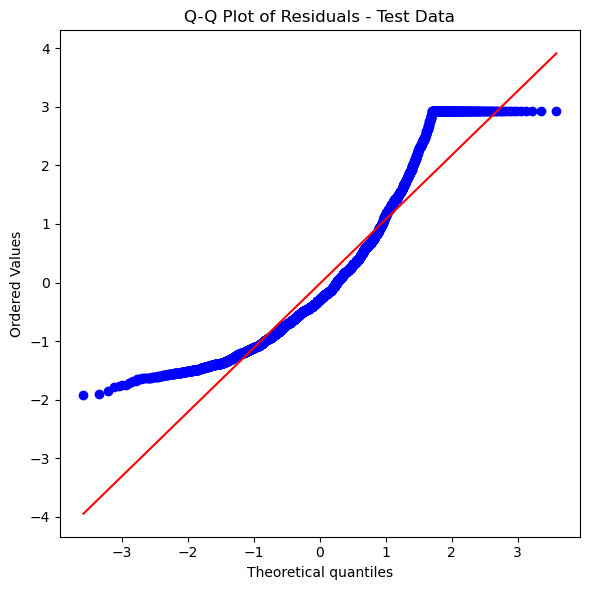

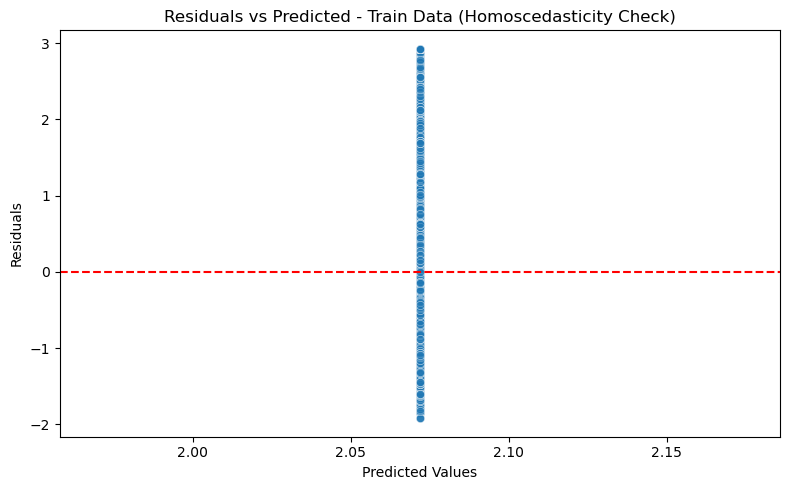

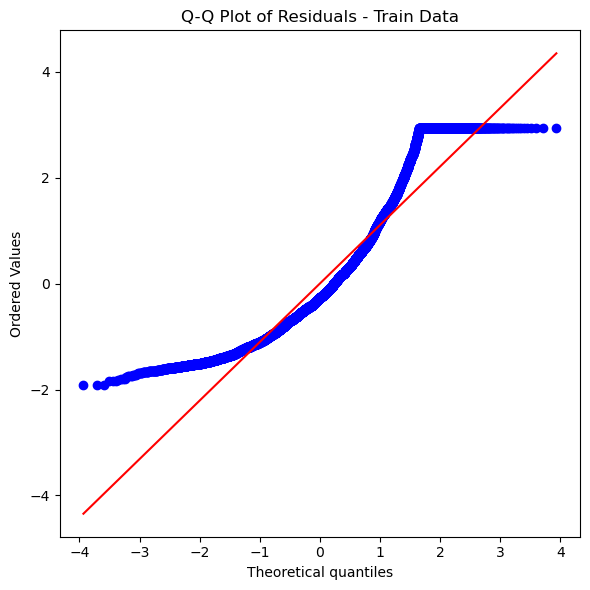

In [24]:
plot_residuals_vs_predicted(y_test, y_test_pred, label="Test Data", plot_qq=True)
plot_residuals_vs_predicted(y_train, y_train_pred, label="Train Data", plot_qq=True)


<a id="evaluation-metrics"></a>
#### 📏 Evaluation Metrics

<details><summary><strong>📖 Click to Expand</strong></summary> <ul> <li><strong>R² (R-squared)</strong>: Measures how well the model explains the variance in the target variable. A higher R² indicates better model fit. A value of 1 indicates perfect fit, while 0 indicates the model doesn't explain any variance.</li> <li><strong>Adjusted R²</strong>: Similar to R² but adjusts for the number of predictors in the model. Useful when comparing models with different numbers of features.</li> <li><strong>Mean Absolute Error (MAE)</strong>: The average of the absolute differences between predicted and actual values. It provides a straightforward interpretation of model performance in the same units as the target variable.</li> <li><strong>Mean Squared Error (MSE)</strong>: The average of the squared differences between predicted and actual values. MSE penalizes larger errors more than MAE.</li> <li><strong>Root Mean Squared Error (RMSE)</strong>: The square root of MSE. It provides a more interpretable value by returning the error in the same units as the target variable, while still penalizing large errors.</li> <li><strong>Mean Absolute Percentage Error (MAPE)</strong>: Expresses the error as a percentage, making it easier to understand in business terms. A lower MAPE indicates better model accuracy.</li> </ul> <p><strong>MAE, MSE, and RMSE</strong> are the primary regression metrics:</p> <ul> <li><strong>MAE</strong>: Easier to interpret in the same units as the target variable. It’s useful when you want a simple error metric.</li> <li><strong>MSE</strong>: Penalizes larger errors more heavily than MAE. Useful when large errors are especially undesirable.</li> <li><strong>RMSE</strong>: More interpretable than MSE, since it’s in the same units as the target variable. It’s widely used when you want to penalize large errors more.</li> </ul> <p><strong>Business Perspective:</strong></p> <ul> <li><strong>MAPE</strong> is often preferred when you need an easily interpretable error metric in percentage terms, especially for business use cases like sales forecasting or demand prediction.</li> <li><strong>MAE</strong> is useful when you care about errors in the **same unit** as your target, and when you don’t want to penalize large errors disproportionately.</li> <li><strong>RMSE</strong> is important when large errors have a significant impact on the business and you want to **penalize** them more heavily than smaller ones.</li> <li><strong>R²</strong> is key when you want to understand **how well the model fits** the data, but may not always be reliable in the presence of outliers or non-linear relationships.</li> </ul> <p>These metrics provide a more comprehensive understanding of model performance, especially when accuracy alone is not sufficient in regression tasks.</p> </details>

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model_performance(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred):
    # Train performance
    print("🔧 Train Performance")
    print(f"R²: {r2_score(y_train, y_train_pred):.3f} → Explains {r2_score(y_train, y_train_pred)*100:.0f}% of variation in target")
    print(f"Adjusted R²: {1 - (1 - r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1):.3f}")
    print(f"MAPE: {np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100:.2f}% → On average, we're off by this percentage")
    print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.2f} → On average, we're off by ±${mean_absolute_error(y_train, y_train_pred)*100000:.0f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f} → Penalizes big misses more heavily")

    # Test performance
    print("\n🧪 Test Performance")
    print(f"R²: {r2_score(y_test, y_test_pred):.3f} → Explains {r2_score(y_test, y_test_pred)*100:.0f}% of variation in target")
    print(f"Adjusted R²: {1 - (1 - r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1):.3f}")
    print(f"MAPE: {np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100:.2f}% → On average, we're off by this percentage")
    print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f} → On average, we're off by ±${mean_absolute_error(y_test, y_test_pred)*100000:.0f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f} → Penalizes big misses more heavily")


In [26]:
evaluate_model_performance(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

🔧 Train Performance
R²: 0.000 → Explains 0% of variation in target
Adjusted R²: -0.000
MAPE: 62.08% → On average, we're off by this percentage
MAE: 0.91 → On average, we're off by ±$91391
RMSE: 1.16 → Penalizes big misses more heavily

🧪 Test Performance
R²: -0.000 → Explains -0% of variation in target
Adjusted R²: -0.002
MAPE: 62.89% → On average, we're off by this percentage
MAE: 0.91 → On average, we're off by ±$90607
RMSE: 1.14 → Penalizes big misses more heavily


In [27]:
def evaluate_regression_model(y_true, y_pred, label="Model"):
    # Calculate regression metrics
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_train.shape[1] - 1)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Aligned core metrics
    print(f"\n📊 {label} — Performance Summary:")
    print(f"- R²          : {r2:>7.2f} → Explains the variance of the target.")
    print(f"- Adjusted R² : {adjusted_r2:>7.2f}")
    print(f"- MAPE        : {mape:>7.2f}% → On average, we're off by this percentage.")
    print(f"- MAE         : {mae:>7.2f} → On average, we're off by ±${mae*100000:.0f}")
    print(f"- RMSE        : {rmse:>7.2f} → Penalizes large misses more heavily.")

    # Business interpretation
    print("\n📌 Interpretation:")
    if mape > 10:
        print("- High MAPE → model might need improvement.")
    else:
        print("- MAPE is acceptable; model is performing well.")

    if mae > 1:
        print("- High MAE → model might need improvement.")
    else:
        print("- MAE is acceptable; the model is performing well.")

    if rmse > 1:
        print("- High RMSE → model is not handling large errors well.")
    else:
        print("- RMSE is acceptable; model is not penalizing large errors excessively.")

    print(f"- R² indicates model fit: {r2:.2f}")

# Example usage
evaluate_regression_model(y_test, y_test_pred, label="Baseline Regressor")



📊 Baseline Regressor — Performance Summary:
- R²          :   -0.00 → Explains the variance of the target.
- Adjusted R² :   -0.00
- MAPE        :   62.89% → On average, we're off by this percentage.
- MAE         :    0.91 → On average, we're off by ±$90607
- RMSE        :    1.14 → Penalizes large misses more heavily.

📌 Interpretation:
- High MAPE → model might need improvement.
- MAE is acceptable; the model is performing well.
- High RMSE → model is not handling large errors well.
- R² indicates model fit: -0.00


<a id="update-best-model"></a>
#### 🧮 Update Best Model Info

In [28]:
import numpy as np
from termcolor import colored
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def update_best_model_info(model_name, model_obj, y_train, y_test, y_train_pred, y_test_pred, hyperparameters=None):
    """
    Computes prediction metrics internally, updates best_model_info if model outperforms current best.
    Also logs all model results.
    """
    # Evaluate performance
    metrics = {
        "train": {
            "r2": r2_score(y_train, y_train_pred),
            "adjusted_r2": 1 - (1 - r2_score(y_train, y_train_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1),
            "mape": np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
            "mse": mean_squared_error(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred)
        },
        "test": {
            "r2": r2_score(y_test, y_test_pred),
            "adjusted_r2": 1 - (1 - r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1),
            "mape": np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100,
            "rmse": np.sqrt(mean_squared_error(y_test, y_test_pred)),
            "mse": mean_squared_error(y_test, y_test_pred),
            "mae": mean_absolute_error(y_test, y_test_pred)
        }
    }

    # Compare with current best
    current_score = metrics["test"]["r2"]  # You can choose a different success metric if needed
    best_score = best_model_info["metrics"]["test"].get("r2", -np.inf)
    previous_best = best_model_info["name"] or "None"

    if current_score > best_score:
        best_model_info.update({
            "name": model_name,
            "model": model_obj,
            "metrics": metrics,
            "hyperparameters": hyperparameters or {}
        })
        print(colored(
            f"✅ {model_name} just beat previous best ({previous_best}) → "
            f"R²: {best_score:.4f} → {current_score:.4f}", "green"))

    # Log all model results
    model_results[model_name] = {
        "model": model_obj,
        "metrics": metrics,
        "hyperparameters": hyperparameters or {}
    }

In [29]:
# Example usage with the existing Dummy Regressor (Baseline Model)
update_best_model_info(
    model_name="Baseline Model",
    model_obj=dummy_regressor,  # Using the existing baseline model
    y_train=y_train,
    y_test=y_test,
    y_train_pred=y_train_pred,
    y_test_pred=y_test_pred,
    hyperparameters={"strategy": "mean"}
)


✅ Baseline Model just beat previous best (None) → R²: -inf → -0.0002


In [30]:
# from pprint import pprint
# pprint(best_model_info)
# pprint(model_results)

# import json
# print(json.dumps(best_model_info, indent=2, default=str))
# print(json.dumps(model_results, indent=2, default=str))

[Back to the top](#table-of-contents)
___



<a id="algorithms"></a>
# 🔍 Algorithms

<a id="linear-regression"></a>
### ⚙️ Algorithms - Linear Regression

<details><summary><strong>📖 Click to Expand</strong></summary>

A **linear regression model** estimates the outcome as a weighted sum of input features:

&nbsp;

**Equation:**  
$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$

&nbsp;

**Where:**
- $\hat{y}$: Predicted value  
- $\beta_0$: Intercept  
- $x_i$: Input feature  
- $\beta_i$: Weight of each feature

The model finds the best-fitting line by minimizing the **sum of squared errors**:

&nbsp;

**Objective:**  
$\text{Minimize} \quad \sum (y_i - \hat{y}_i)^2$

&nbsp;

In business terms:  
Each feature has a consistent “price tag” — the model tells you how much a change in input pushes the prediction up or down.

</details>


<a id="fit-model"></a>
#### 🏗️ Model Fit

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Recreate X and y if needed
X = df.drop(columns=[target_col])
y = df[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit base linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


LinearRegression()

<a id="leverage-points"></a>
#### 🔍 Leverage - Outlier Detection

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧠 What is Leverage?

- **Leverage** measures how far an observation's feature values are from the mean of all observations.
- It identifies points that sit on the edge of the predictor space — even if they don’t have large residuals.
- In matrix terms, leverage comes from the **hat matrix** $H = X(X^TX)^{-1}X^T$.

##### 📐 Math:

- The **leverage score** for point $i$ is $h_i = H_{ii}$ (the diagonal of the hat matrix).
- $h_i$ ranges from $0$ to $1$, and high values mean the observation has strong influence on its own predicted value.

##### 💡 Intuition:

- High leverage points may not be outliers in $y$, but they have unusual $X$ values.
- Think of them as **data points in weird neighborhoods** — the model leans heavily on them to make predictions there.

</details>


<details><summary><strong>📖 Click to Expand - What if high leverage?</strong></summary>

##### 🚨 What It Means

- High leverage points have **unusual input values** — they sit far from the average data pattern.
- The model relies heavily on them to define the shape of the regression line.
- They're not necessarily outliers in the target, but they’re structurally extreme.

##### 🧠 What You Can Do

- **Inspect**: Are they legit or data glitches?
- **Compare**: Refit the model without them — if results shift a lot, they're too influential.
- **Mitigate**: Use robust models (Ridge, Trees), cap feature extremes, or reweight carefully.

##### 💡 Key Insight

> High leverage = “this point is setting the rules.”  
> Sometimes that’s okay. Sometimes it’s dangerous.

</details>

<Figure size 800x400 with 0 Axes>

<StemContainer object of 3 artists>

Text(0.5, 0, 'Observation Index')

Text(0, 0.5, 'Leverage')

Text(0.5, 1.0, 'Leverage Scores')

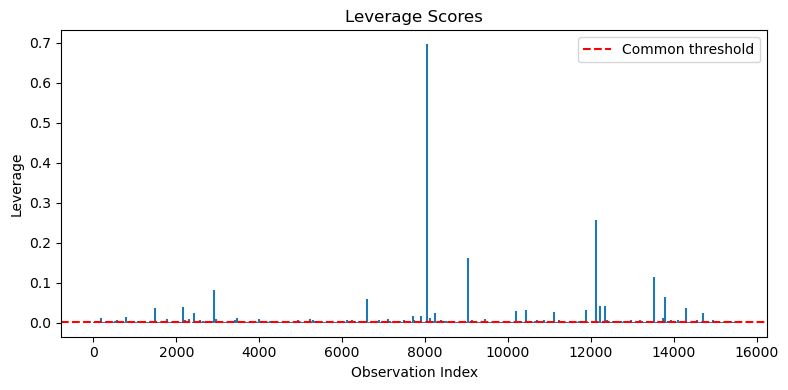

In [32]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Add intercept to X for statsmodels
X_with_const = sm.add_constant(X_train)

# Fit OLS model using statsmodels
model = sm.OLS(y_train, X_with_const).fit()

# Get leverage scores from hat matrix
influence = model.get_influence()
leverage = influence.hat_matrix_diag

# Plot leverage scores
plt.figure(figsize=(8, 4))
plt.stem(np.arange(len(leverage)), leverage, markerfmt=" ", basefmt=" ")
plt.axhline(2 * X_with_const.shape[1] / X_with_const.shape[0], color='red', linestyle='--', label='Common threshold')
plt.xlabel("Observation Index")
plt.ylabel("Leverage")
plt.title("Leverage Scores")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
# Show top N leverage observations with full feature + target + leverage score
top_n = 5
top_idx = np.argsort(leverage)[-top_n:][::-1]

# Build DataFrame
high_leverage_df = X_train.iloc[top_idx].copy()
high_leverage_df[y_train.name] = y_train.iloc[top_idx].values
high_leverage_df["Leverage"] = leverage[top_idx]

print(f"🔍 Top {top_n} High-Leverage Observations:")
display(high_leverage_df)

🔍 Top 5 High-Leverage Observations:


MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  \
19006  10.2264      45.0    3.166667   0.833333      7460.0  1243.333333   
1914    1.8750      33.0  141.909091  25.636364        30.0     2.727273   
3364    5.5179      36.0    5.142857   1.142857      4198.0   599.714286   
16669   4.2639      46.0    9.076923   1.307692      6532.0   502.461538   
11862   2.6250      25.0   59.875000  15.312500        28.0     1.750000   

       Latitude  Longitude  MedHouseVal  Leverage  
19006     38.32    -121.98      1.37500  0.696212  
1914      38.91    -120.10      5.00001  0.255724  
3364      40.41    -120.51      0.67500  0.162325  
16669     35.32    -120.70      3.50000  0.115033  
11862     40.27    -121.25      0.67500  0.082439

<a id="cooks-distance"></a>
#### 🔥 Cook’s Distance - Outlier Detection

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔥 What It Measures

- **Cook’s Distance** combines both **leverage** and **residual size**.
- It tells you how much the model's predictions would **change** if you removed a specific observation.
- In short: **“How much does this point bend the model?”**

##### 📐 Math (Simplified)

For each point $i$:
\
$D_i = \frac{(y_i - \hat{y}_i)^2}{p \cdot MSE} \cdot \frac{h_i}{(1 - h_i)^2}$

  where:
  - $h_i$ = leverage
  - $p$ = number of parameters
  - $MSE$ = mean squared error

##### 🧠 What To Do With It

- Points with **high Cook’s D** have both high leverage *and* large residuals → red flags.
- They may be real edge cases or data issues — investigate.
- Use a threshold like `4 / n` or compare to the top 5% of values.

##### 💡 Intuition

> Leverage = weird position.  
> Residual = big error.  
> **Cook’s Distance = both.**

</details>


<Figure size 1000x400 with 0 Axes>

<StemContainer object of 3 artists>

Text(0.5, 1.0, "Cook's Distance")

Text(0.5, 0, 'Observation Index')

Text(0, 0.5, "Cook's D")

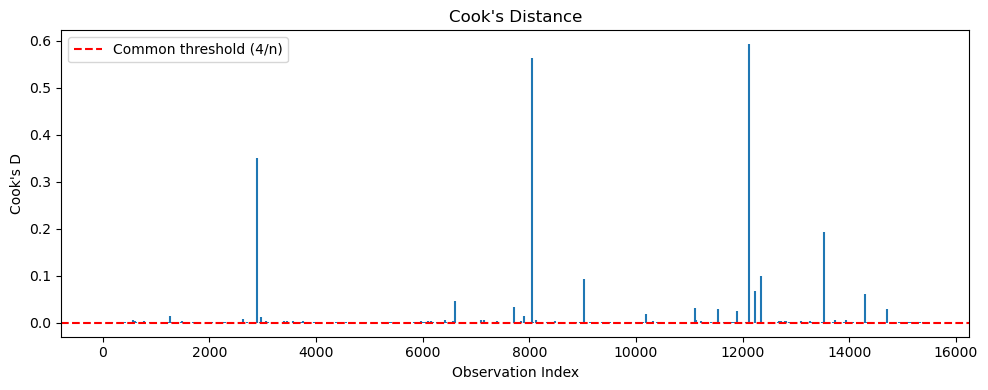

🔥 Top 5 Most Influential Observations (Cook’s Distance):


MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  \
1914    1.8750      33.0  141.909091  25.636364        30.0     2.727273   
19006  10.2264      45.0    3.166667   0.833333      7460.0  1243.333333   
11862   2.6250      25.0   59.875000  15.312500        28.0     1.750000   
16669   4.2639      46.0    9.076923   1.307692      6532.0   502.461538   
1102    2.4028      17.0   31.777778   9.703704        47.0     1.740741   

       Latitude  Longitude  MedHouseVal  Cook's D  
1914      38.91    -120.10      5.00001  0.592553  
19006     38.32    -121.98      1.37500  0.563744  
11862     40.27    -121.25      0.67500  0.350446  
16669     35.32    -120.70      3.50000  0.193252  
1102      40.06    -121.54      0.67500  0.099953

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Add constant and fit OLS model
X_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_const).fit()

# Compute influence
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]  # First element is the array of distances

# Plot Cook's Distance
plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=" ", basefmt=" ")
plt.axhline(4 / len(X_train), color='red', linestyle='--', label="Common threshold (4/n)")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's D")
plt.legend()
plt.tight_layout()
plt.show()

# Print top N influential points
top_n = 5
top_idx = np.argsort(cooks_d)[-top_n:][::-1]
cooks_df = X_train.iloc[top_idx].copy()
cooks_df[y_train.name] = y_train.iloc[top_idx].values
cooks_df["Cook's D"] = cooks_d[top_idx]

print(f"🔥 Top {top_n} Most Influential Observations (Cook’s Distance):")
display(cooks_df)

<!-- <a id="interpretability"></a>
# 🧠 Interpretability -->

<a id="coefficients"></a>
#### 🔢 Coefficients

In [35]:
# View model coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Identify most impactful positive and negative drivers
top_positive = coeff_df.iloc[0]
top_negative = coeff_df.iloc[coeff_df["Coefficient"].idxmin()]

print("🧠 Interpretation Summary:")
print(f"- 💡 '{top_positive['Feature']}' has the strongest positive effect on {target_col} (for a unit increase).")
print(f"- 🔻 '{top_negative['Feature']}' has the strongest negative effect on {target_col} (for a unit increase).")

# Optional threshold for low-impact features
low_impact = coeff_df[coeff_df["Coefficient"].abs() < 0.01]["Feature"].tolist()
if low_impact:
    print(f"- 💤 Features like {', '.join(low_impact)} have **minimal predictive power** in this model.")


coeff_df


🧠 Interpretation Summary:
- 💡 'AveBedrms' has the strongest positive effect on MedHouseVal (for a unit increase).
- 🔻 'Population' has the strongest negative effect on MedHouseVal (for a unit increase).
- 💤 Features like HouseAge, AveOccup, Population have **minimal predictive power** in this model.


Feature  Coefficient
3   AveBedrms     0.794471
0      MedInc     0.447600
7   Longitude    -0.433405
6    Latitude    -0.418555
2    AveRooms    -0.124756
1    HouseAge     0.009568
5    AveOccup    -0.003443
4  Population    -0.000001

<a id="vif"></a>
#### 🧮 VIF (optional)

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recompute VIF for final X
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]
vif_data = vif_data.sort_values("VIF", ascending=False)

# Show table
display(vif_data)

# Interpretation
vif_threshold = 5
high_vif = vif_data[vif_data["VIF"] > vif_threshold]["Feature"].tolist()

print("\n📉 Multicollinearity Interpretation:")
if high_vif:
    print(f"- ⚠️ The following features may be strongly correlated with others: {', '.join(high_vif)}")
    print("- This could make individual feature effects harder to trust.")
else:
    print("- ✅ No problematic multicollinearity — all features are within acceptable VIF range.")


Feature       VIF
6    Latitude  9.297624
7   Longitude  8.962263
2    AveRooms  8.342786
3   AveBedrms  6.994995
0      MedInc  2.501295
1    HouseAge  1.241254
4  Population  1.138125
5    AveOccup  1.008324


📉 Multicollinearity Interpretation:
- ⚠️ The following features may be strongly correlated with others: Latitude, Longitude, AveRooms, AveBedrms
- This could make individual feature effects harder to trust.


<a id="r2-factors"></a>
#### 📊 What impacts R²


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Coefficient', ylabel='Feature'>

Text(0.5, 1.0, 'Feature Contribution Magnitude (Absolute Coefficients)')

Text(0.5, 0, 'Impact on Prediction (|β|)')

Text(0, 0.5, 'Feature')

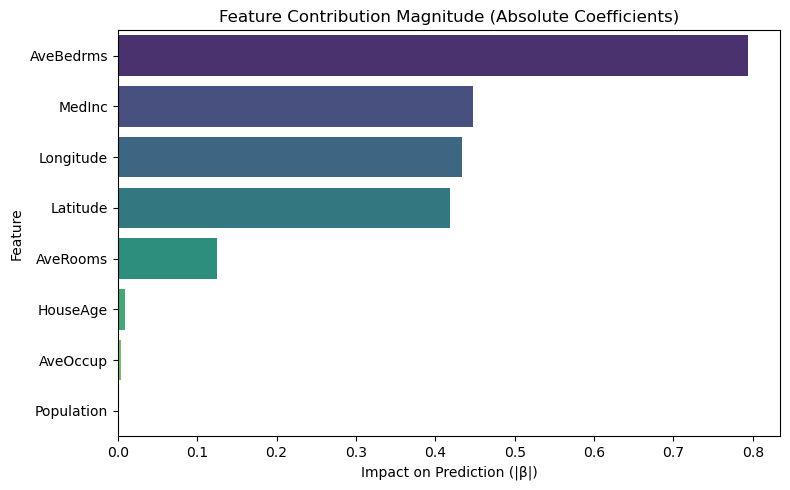

🧠 Interpretation:
- The higher the margitude, the more influence that feature has on the prediction — regardless of direction.
- This helps identify which features the model is leaning on most heavily to make predictions.
- Note: High influence doesn’t mean causation — just strong correlation within this dataset.


In [37]:
# Bar plot of absolute coefficients to show feature impact on variance explained
plt.figure(figsize=(8, 5))
sns.barplot(
    x=coeff_df["Coefficient"].abs(),
    y=coeff_df["Feature"],
    palette="viridis"
)
plt.title("Feature Contribution Magnitude (Absolute Coefficients)")
plt.xlabel("Impact on Prediction (|β|)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Business interpretation
print("🧠 Interpretation:")
print("- The higher the margitude, the more influence that feature has on the prediction — regardless of direction.")
print("- This helps identify which features the model is leaning on most heavily to make predictions.")
print("- Note: High influence doesn’t mean causation — just strong correlation within this dataset.")


<a id="overfitting"></a>
#### 🚨 Overfitting indicators


In [38]:
# Quick check: Train vs Test R²
print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test  R²: {r2_score(y_test, y_test_pred):.3f}")

gap = r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred)
print(f"Gap: {gap:.3f}")

if gap > 0.1:
    print("⚠️ Likely overfitting — model performs much better on training data.")
else:
    print("✅ No strong overfitting signal — train/test performance is similar.")


Train R²: 0.610
Test  R²: 0.591
Gap: 0.019
✅ No strong overfitting signal — train/test performance is similar.


<a id="shap"></a>
#### 🔬 SHAP



<details><summary><strong>📖 Click to Expand</strong></summary>

- **SHAP (SHapley Additive exPlanations)** helps explain how much each feature contributed to a specific prediction.
- Unlike coefficients, SHAP accounts for interactions and context — making it more reliable for understanding **why** the model made a decision.
- Think of it like **splitting the credit** (or blame) for each prediction across features.

- **PDP (Partial Dependence Plots)** show how a single feature affects predictions while holding others constant.
- Useful to answer: *“As this feature increases, does the predicted outcome go up or down — and by how much?”*

Together, SHAP and PDP bridge the gap between complex models and human intuition.

</details>

LinearRegression()

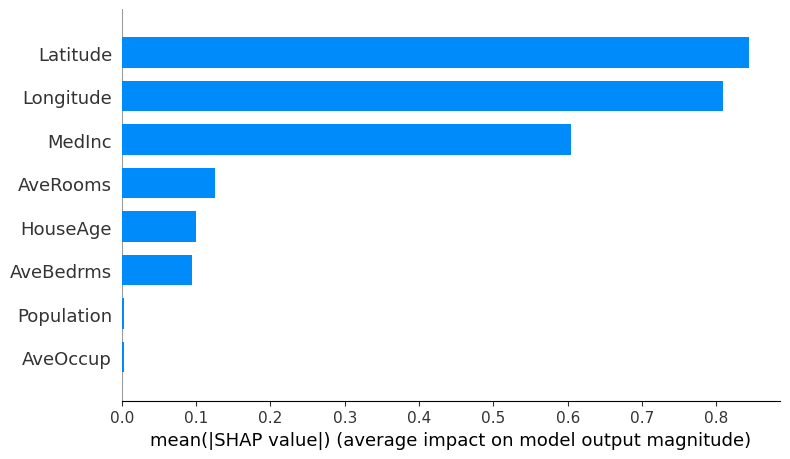

🧠 Interpretation:
- This shows which features contribute most to the model’s predictions across all data points.
- The top features are the biggest drivers of predicted changes in the target.
- Unlike raw coefficients, SHAP values account for interactions and provide a more reliable ranking.


In [39]:
import shap

# Fit model on full data for SHAP
lr.fit(X, y)
explainer = shap.Explainer(lr, X)
shap_values = explainer(X)

# SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

# Business interpretation
print("🧠 Interpretation:")
print("- This shows which features contribute most to the model’s predictions across all data points.")
print("- The top features are the biggest drivers of predicted changes in the target.")
print("- Unlike raw coefficients, SHAP values account for interactions and provide a more reliable ranking.")


<a id="pdp"></a>
#### 📊 Partial Dependence Plot


<details><summary><strong>📖 Click to Expand</strong></summary>

- A **Partial Dependence Plot (PDP)** shows how the model’s prediction changes as one feature changes, while keeping all other features constant.
- It answers questions like:
  - *“If income increases, how does predicted price change — assuming everything else stays the same?”*
- This helps identify:
  - Whether the relationship is **linear or non-linear**
  - If there are **threshold effects** or diminishing returns
- PDPs are useful for detecting effects that coefficients alone may hide — especially in more complex models.

</details>


Text(0.5, 0.98, 'Partial Dependence Plots (Top Features)')

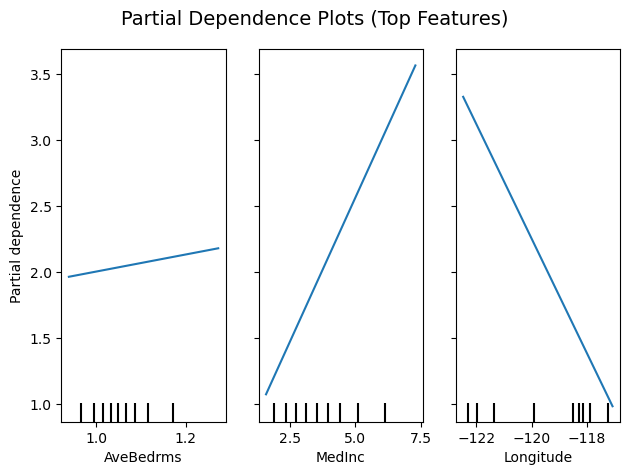

🧠 Interpretation:
- These plots show how the predicted value of 'MedHouseVal' changes when one feature increases, while holding others fixed.
  • As 'AveBedrms' increases, observe whether 'MedHouseVal' rises, falls, or stays flat — this shows its individual effect.
  • As 'MedInc' increases, observe whether 'MedHouseVal' rises, falls, or stays flat — this shows its individual effect.
  • As 'Longitude' increases, observe whether 'MedHouseVal' rises, falls, or stays flat — this shows its individual effect.
- A flat curve → minimal impact. A steep or curved slope → strong or non-linear influence.


In [40]:
from sklearn.inspection import PartialDependenceDisplay

# Pick top 2–3 features from SHAP or coefficients
top_features = coeff_df["Feature"].head(3).tolist()

# Plot PDP
PartialDependenceDisplay.from_estimator(
    lr, X, features=top_features, kind="average", grid_resolution=50
)
plt.suptitle("Partial Dependence Plots (Top Features)", fontsize=14)
plt.tight_layout()
plt.show()

# Business interpretation — tailored to dataset
print("🧠 Interpretation:")
print(f"- These plots show how the predicted value of '{target_col}' changes when one feature increases, while holding others fixed.")
for feature in top_features:
    print(f"  • As '{feature}' increases, observe whether '{target_col}' rises, falls, or stays flat — this shows its individual effect.")
print("- A flat curve → minimal impact. A steep or curved slope → strong or non-linear influence.")


<a id="ridge-regression"></a>
### 🧊 Algorithms - Ridge Regression

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Ridge regression** adds a penalty that discourages large coefficients.  
- It’s useful when all features are important but may be correlated.

&nbsp;

**Objective function:**  
$\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum \beta_j^2$

&nbsp;

- The penalty term $\lambda \sum \beta_j^2$ shrinks coefficients without zeroing them out.
- This reduces overfitting but **keeps all features** in the model.
- Works well when you want to **retain information** while controlling variance.

</details>

<details><summary><strong>📖 Click to Expand - Regularized Regression </strong></summary>

    - Regularized regression is like **linear regression with guardrails** — it helps prevent overfitting and improves generalization.
    - It’s especially useful when:
      - You have **many features**, some of which may be noisy or redundant.
      - There's **multicollinearity** (features are correlated).
      - The model performs **too well on training but poorly on test data**.
    
    There are 3 main types:
    - **Ridge**: Shrinks coefficients, but keeps all features
    - **Lasso**: Shrinks some coefficients all the way to zero → does feature selection
    - **ElasticNet**: A mix of both
    
    Use regularization when your model has **high variance** or you want to **simplify** the feature set.
    
    </details>

In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_ridge_train = ridge.predict(X_train)
y_ridge_test = ridge.predict(X_test)

print("🔧 Ridge Regression")
print(f"Train R²: {r2_score(y_train, y_ridge_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_ridge_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_ridge_test):.2f}")

Ridge()

🔧 Ridge Regression
Train R²: 0.610
Test  R²: 0.591
Test  MAE: 0.53


<a id="lasso-regression"></a>
### 🔥 Algorithms - Lasso Regression
<details><summary><strong>📖 Click to Expand</strong></summary>

- **Lasso regression** adds a penalty on the **absolute values** of coefficients.  
- It helps with **feature selection** by shrinking some coefficients to exactly zero.

&nbsp;

**Objective function:**  
$\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |\beta_j|$

&nbsp;

- The $L1$ penalty encourages **sparsity** — only the most important features survive.
- Use Lasso when you suspect some features **don’t matter** or want a **simpler model**.

</details>

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_lasso_train = lasso.predict(X_train)
y_lasso_test = lasso.predict(X_test)

print("🔥 Lasso Regression")
print(f"Train R²: {r2_score(y_train, y_lasso_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_lasso_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_lasso_test):.2f}")

Lasso(alpha=0.1)

🔥 Lasso Regression
Train R²: 0.546
Test  R²: 0.544
Test  MAE: 0.58


<a id="elasticnet"></a>
### 🧃 Algorithms - ElasticNet

<details><summary><strong>📖 Click to Expand</strong></summary>

- **ElasticNet** blends Ridge (L2) and Lasso (L1) penalties.  
- It balances **stability and sparsity** — best when you're not sure which to use.

&nbsp;

**Objective function:**  
$\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda_1 \sum |\beta_j| + \lambda_2 \sum \beta_j^2$

&nbsp;

- The L1 part helps with **feature selection**, while L2 improves **stability**.
- ElasticNet is often used as a **default choice** when working with many features.

</details>

In [43]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_elastic_train = elastic.predict(X_train)
y_elastic_test = elastic.predict(X_test)

print("🧃 ElasticNet Regression")
print(f"Train R²: {r2_score(y_train, y_elastic_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_elastic_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_elastic_test):.2f}")

ElasticNet(alpha=0.1)

🧃 ElasticNet Regression
Train R²: 0.576
Test  R²: 0.575
Test  MAE: 0.55


<a id="decision-trees"></a>
### 🌳 Algorithms - Decision Trees


<details><summary><strong>📖 Click to Expand</strong></summary>

A **Decision Tree** is a non-linear model that splits the data into subsets based on feature values. It recursively divides the dataset into branches, making decisions at each node based on a feature threshold.

&nbsp;

**How it works:**
- **Splitting**: The tree splits data into two groups based on a feature and its value. The objective is to find splits that result in the most homogeneous subsets.
- **Node**: Each node represents a decision rule (e.g., "Is `AveRooms` > 6?").
- **Leaf**: A leaf node represents the predicted value (for regression) or class label (for classification).
- **Tree Construction**: The tree is built by recursively finding the best feature and value to split the data, using metrics like **Gini impurity**, **information gain**, or **mean squared error (MSE)**.

&nbsp;

**Equation (Regression Tree):**
For regression trees, the predicted value at a leaf node is the mean of the target values in that subset.

$\hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

&nbsp;

**Objective:**
Minimize the impurity at each split. For regression, the goal is to minimize the sum of squared errors within the branches.

&nbsp;

**In business terms:**  
A decision tree breaks down a complex problem into simple, easy-to-understand decisions. It’s like following a series of “yes/no” questions that guide you to the right answer.

</details>


<a id="random-forest"></a>
### 🪵 Algorithms - Random Forests

<details><summary><strong>📖 Click to Expand</strong></summary>

A **Random Forest** is an ensemble learning method that creates multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

&nbsp;

**How it works:**
- **Bootstrap Aggregating (Bagging)**: Random Forests use bootstrapping to create multiple subsets of the data. Each tree is trained on a random subset (with replacement) of the data, which introduces diversity in the models.
- **Tree Construction**: Each tree in the forest is trained independently, using a random subset of features for each split. This randomness helps prevent overfitting and ensures that trees do not correlate too much with each other.
- **Voting/Averaging**: For regression tasks, the final prediction is the **average** of all tree predictions. For classification tasks, it’s the **mode** (most frequent class) predicted by the trees.

&nbsp;

**Equation (for Regression):**
For regression, the predicted value is the average of the predictions from all trees.

$\hat{y} = \frac{1}{M} \sum_{i=1}^{M} \hat{y}_i$

Where:
- $\hat{y}_i$: Prediction of the i-th tree
- $M$: Total number of trees in the forest

&nbsp;

**Objective:**
Minimize the variance of the model’s predictions by averaging over many trees, each trained on a different subset of the data.

&nbsp;

**In business terms:**  
Random Forests can be thought of as having a “crowd” of decision makers, where each one gives their opinion, and the final decision is made by taking the average or majority vote. This helps reduce the bias of individual decision trees.

</details>


<a id="gradient-boosting"></a>
### 🚀 Algorithms - Gradient Boosting (XGBoost, LightGBM)

<details><summary><strong>📖 Click to Expand</strong></summary>

**Gradient Boosting** is an ensemble learning technique that builds models sequentially, where each model corrects the errors made by the previous one. The algorithm focuses on minimizing the **loss function** by adding trees that improve the model’s performance in areas where it’s struggling.

&nbsp;

**How it works:**
- **Boosting**: Unlike Random Forests, which train trees independently, Gradient Boosting trains trees **sequentially**. Each tree corrects the residual errors of the previous one by focusing on the examples that were misclassified or poorly predicted.
- **Gradient Descent**: The model uses **gradient descent** to minimize the loss function, optimizing the model step-by-step. The error of the current model is propagated back through the model to update the next tree.
- **Learning Rate**: A key parameter in Gradient Boosting is the **learning rate**. It controls how much each new tree is allowed to influence the final model. A lower learning rate often results in better generalization but requires more trees to achieve the same level of performance.
- **XGBoost/LightGBM**: These are highly optimized versions of Gradient Boosting. **XGBoost** (Extreme Gradient Boosting) and **LightGBM** (Light Gradient Boosting Machine) offer faster training, better regularization, and enhanced performance, especially on large datasets.

&nbsp;

**Objective:**
Minimize the **loss function** (such as mean squared error for regression) through iterative corrections. Each new tree learns from the residuals (errors) of the previous tree.

&nbsp;

**In business terms:**  
Gradient Boosting works like hiring a new team member who focuses on fixing the mistakes made by the previous team member. Over time, as more team members are added, the overall performance improves dramatically by addressing areas of weakness.

</details>


<a id="svm"></a>
### ⚙️ Algorithms - Support Vector Machines (SVR)

<details><summary><strong>📖 Click to Expand</strong></summary>

**Support Vector Machines (SVM)** for regression (SVR) is a powerful algorithm that attempts to find a **hyperplane** that best fits the data while allowing for some margin of error. The idea is to maximize the margin between the data points and the hyperplane while keeping the model complexity low.

&nbsp;

**How it works:**
- **Maximizing the Margin**: The SVR model searches for a hyperplane that not only separates the data points but also ensures that the margin between the data points and the hyperplane is maximized.
- **Epsilon-Insensitive Loss**: In SVR, the margin of error is controlled by a parameter called **epsilon**. Points that lie within this margin are considered as correctly predicted, while points outside the margin are penalized.
- **Kernel Trick**: SVR can be extended to non-linear regression by using the **kernel trick**. This allows SVR to operate in a high-dimensional space, making it capable of handling complex, non-linear relationships.
    - Common kernels include the **linear**, **polynomial**, and **radial basis function (RBF)** kernels.
  
&nbsp;

**Objective:**
Minimize the regularized loss function, which penalizes data points that lie outside the epsilon margin and tries to find the optimal hyperplane.

&nbsp;

**In business terms:**  
SVR works like finding the best-fit line (or hyperplane) that approximates the data while allowing some flexibility for errors. The goal is to minimize prediction errors while ensuring that the model is not overly sensitive to small variations.

</details>


<a id="knn"></a>
### 🧠 Algorithms - K-Nearest Neighbors (KNN)

<details><summary><strong>📖 Click to Expand</strong></summary>

**K-Nearest Neighbors (KNN)** is a simple, non-parametric algorithm used for both classification and regression. The algorithm makes predictions based on the **k** closest training samples in the feature space. The idea is that similar data points are likely to have similar target values.

&nbsp;

**How it works:**
- **Distance Metric**: KNN calculates the **distance** between the query point and all the points in the dataset. Common distance metrics include **Euclidean**, **Manhattan**, and **Minkowski** distances.
- **Prediction for Regression**: In **KNN regression**, the prediction is the **average** of the target values of the **k** nearest neighbors.
    - For example, if `k=3`, the prediction for a query point is the average of the target values of the three nearest points.
- **Prediction for Classification**: In **KNN classification**, the prediction is determined by the **majority vote** from the k nearest neighbors.
- **Choosing k**: The value of **k** determines how many neighbors are considered. A small value of k can make the model sensitive to noise, while a larger k can smooth the prediction but may miss fine details.

&nbsp;

**Objective:**
Minimize the **prediction error** by considering the closest data points and averaging or voting to generate predictions.

&nbsp;

**In business terms:**  
KNN works like asking your closest neighbors for advice. The final decision is based on the majority opinion or average of your nearest peers. It's simple but effective when the data is well-structured and doesn't have too many dimensions (features).

</details>


<a id="neural-networks"></a>
### 🤖 Algorithms - Neural Networks (MLP Regressor)

<details><summary><strong>📖 Click to Expand</strong></summary>

**Neural Networks (MLP Regressor)** are a class of machine learning algorithms inspired by the structure and functioning of the human brain. The **Multilayer Perceptron (MLP)** is a feedforward neural network that consists of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer.

&nbsp;

**How it works:**
- **Neurons**: Each neuron receives input from previous layers, applies a weighted sum of the inputs, adds a bias, and then passes the result through an **activation function** (e.g., ReLU, Sigmoid, Tanh).
- **Forward Propagation**: During training, data passes through the network from input to output. The predicted output is compared to the true target, and the error is computed.
- **Backpropagation**: The error is propagated back through the network to adjust the weights and biases of the neurons, using an optimization algorithm like **Stochastic Gradient Descent (SGD)** or **Adam**.
- **Layers**: The hidden layers allow the network to model complex, non-linear relationships between input features and the target variable.

&nbsp;

**Objective:**
Minimize the **loss function** (e.g., Mean Squared Error for regression) by adjusting the weights and biases of the neurons through backpropagation, using optimization techniques.

&nbsp;

**In business terms:**  
Neural Networks can be thought of as a highly flexible system capable of learning complex patterns. The deeper the network (i.e., the more layers), the better it can capture intricate relationships in the data, much like how the human brain processes and learns from experience.

</details>


[Back to the top](#table-of-contents)
___



<a id="model-exploration"></a>
# 📊 Model Selection

<details><summary><strong>📖 Click to Expand - Model Choice </strong></summary>

##### 🧠 Model Selection Table (Based on Data Characteristics)

| Target Type | Linearly Separable | Correlation | Imbalance | Recommended Models                  | Notes                                                              |
|-------------|---------------------|-------------|-----------|-------------------------------------|---------------------------------------------------------------------|
| Binary      | ✅ True             | Low         | ✅ True   | XGBoost > Random Forest            | Use tree-based models with class weights or resampling.             |
| Binary      | ✅ True             | Low         | ❌ False  | Logistic Regression > SVM          | Start with simple linear models. Use as benchmark.                 |
| Binary      | ✅ True             | High        | ✅ True   | XGBoost > Random Forest            | Use tree-based models with class weights or resampling.             |
| Binary      | ✅ True             | High        | ❌ False  | Logistic Regression > SVM          | Start with simple linear models. Use as benchmark.                 |
| Binary      | ❌ False            | Low         | ✅ True   | XGBoost > Random Forest            | Boosting or RF with class weights to handle imbalance + complexity. |
| Binary      | ❌ False            | Low         | ❌ False  | Random Forest > Decision Tree      | Simple non-linear trees likely sufficient. Avoid tuning-heavy models. |
| Binary      | ❌ False            | High        | ✅ True   | XGBoost > Random Forest            | Boosting or RF with class weights to handle imbalance + complexity. |
| Binary      | ❌ False            | High        | ❌ False  | Random Forest > Decision Tree      | Simple non-linear trees likely sufficient. Avoid tuning-heavy models. |
| Multiclass  | ✅ True             | Low         | ✅ True   | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ✅ True             | Low         | ❌ False  | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ✅ True             | High        | ✅ True   | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ✅ True             | High        | ❌ False  | XGBoost > Logistic Regression      | Use OvR strategy with LR/XGB. Watch for class separation.           |
| Multiclass  | ❌ False            | Low         | ✅ True   | Neural Network > KNN               | Use Neural Net or KNN. Prioritize decision boundary complexity.     |
| Multiclass  | ❌ False            | Low         | ❌ False  | Neural Network > KNN               | Use Neural Net or KNN. Prioritize decision boundary complexity.     |
| Multiclass  | ❌ False            | High        | ✅ True   | XGBoost > Random Forest            | Tree-based models preferred. Skip preprocessing of collinear features. |
| Multiclass  | ❌ False            | High        | ❌ False  | XGBoost > Random Forest            | Tree-based models preferred. Skip preprocessing of collinear features. |
</details>



<details><summary><strong>📖 Click to Expand - Model Choice FlowChart</strong></summary>

##### 🧠 Model Selection Flowchart (Based on Data Characteristics)

```text
🎯 Target Type = Binary?
  ├── ✅ Yes
  │   ├── 📈 Linearly Separable?
  │   │   ├── ✅ Yes
  │   │   │   ├── 🧬 Feature Type = Categorical?
  │   │   │   │   ├── ✅ ------------------------------------------> 🌲 Random Forest > 🚀 XGBoost
  │   │   │   │   └── ❌ → 📉 Correlation = High?
  │   │   │   │         ├── ✅ ------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │   │         └── ❌ → ⚠️ Missing Data?
  │   │   │   │               ├── ✅ ------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │   │   │   │               └── ❌ ⚠️ Outliers Present?
  │   │   │   │                     ├── ✅ → ⚖️ Imbalanced?
  │   │   │   │                     │   ├── ✅ --------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │   │                     │   └── ❌ --------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   │   │                     └── ❌ ------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   │   └── ❌ → 📉 Correlation = High?
  │   │   │         ├── ✅ ----------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │         └── ❌ → ⚠️ Missing Data?
  │   │   │               ├── ✅ ----------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │   │   │               └── ❌ → ⚠️ Outliers Present?
  │   │   │                     ├── ✅ → ⚖️ Imbalanced?
  │   │   │                     │   ├── ✅ ------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │   │                     │   └── ❌ ------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   │                     └── ❌ ----------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │   └── ❌ → ⚠️ Missing Data?
  │   │         ├── ✅ --------------------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │   │         └── ❌ → ⚠️ Outliers Present?
  │   │               ├── ✅ → ⚖️ Imbalanced?
  │   │               │   ├── ✅ ----------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │   │               │   └── ❌ ----------------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   │               └── ❌ --------------------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │   └── ❌ No (Multiclass)
  │         ├── 📈 Linearly Separable?
  │         │   ├── ✅ Yes
  │         │   │   ├── 🧬 Feature Type = Categorical?
  │         │   │   │   ├── ✅ ------------------------------------> 🌲 Random Forest > 🚀 XGBoost
  │         │   │   │   └── ❌ → 📉 Correlation = High?
  │         │   │   │         ├── ✅ ------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │   │         └── ❌ → ⚠️ Missing Data?
  │         │   │   │               ├── ✅ ------------------------> 🚀 XGBoost > 🧠 Neural Network
  │         │   │   │               └── ❌ → ⚠️ Outliers Present?
  │         │   │   │                     ├── ✅ → ⚖️ Imbalanced?
  │         │   │   │                     │   ├── ✅ --------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │   │                     │   └── ❌ --------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   │   │                     └── ❌ ------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   │   └── ❌ → 📉 Correlation = High?
  │         │   │         ├── ✅ ----------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │         └── ❌ → ⚠️ Missing Data?
  │         │   │               ├── ✅ ----------------------------> 🚀 XGBoost > 🧠 Neural Network
  │         │   │               └── ❌ → ⚠️ Outliers Present?
  │         │   │                     ├── ✅ → ⚖️ Imbalanced?
  │         │   │                     │   ├── ✅ ------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │   │                     │   └── ❌ ------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   │                     └── ❌ ----------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │   └── ❌ → 📉 Correlation = High?
  │         │         ├── ✅ → ------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │         └── ❌ → ⚠️ Missing Data?
  │         │               ├── ✅ --------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │         │               └── ❌ → ⚠️ Outliers Present?
  │         │                     ├── ✅ → ⚖️ Imbalanced?
  │         │                     │   ├── ✅ ----------------------> 🚀 XGBoost > 🌲 Random Forest
  │         │                     │   └── ❌ ----------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         │                     └── ❌ --------------------------> 🌲 Random Forest > 🌳 Decision Tree
  │         └── ❌ 🧬 Feature Type = Categorical?
  │               ├── ✅ ------------------------------------------> 🌲 Random Forest > 🚀 XGBoost
  │               └── ❌ → 📉 Correlation = High?
  │                     ├── ✅ ------------------------------------> 🚀 XGBoost > 🌲 Random Forest
  │                     └── ❌ → ⚠️ Missing Data?
  │                           ├── ✅ ------------------------------> 🚀 XGBoost > 🧠 Neural Network
  │                           └── ❌ → ⚠️ Outliers Present?
  │                                 ├── ✅ → ⚖️ Imbalanced?
  │                                 │   ├── ✅ --------------------> 🚀 XGBoost > 🌲 Random Forest
  │                                 │   └── ❌ --------------------> 🌲 Random Forest > 🌳 Decision Tree
  │                                 └── ❌ ------------------------> 🌲 Random Forest > 🌳 Decision Tree
  └── End
```


</details>

<a id="recommend-models"></a>
#### 🧠 Recommend Models

In [44]:
# Import necessary libraries for regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

model_registry = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "Neural Network (MLP Regressor)": MLPRegressor(max_iter=1000)
}

In [45]:
def recommend_models_prediction(data_characteristics, verbose=True):
    """
    Scores and ranks regression models based on data characteristics.
    Prints the recommended order and rationales.
    """
    from termcolor import colored

    score = {}
    rationale = {}
    
    # Extract characteristics
    target_info = data_characteristics.get("target_variable", {})
    feature_info = data_characteristics.get("features", {})
    is_linear = data_characteristics.get("relationships", {}).get("feature_target_linear_relationships", {})

    imbalance = target_info.get("imbalance", False)
    feature_type = feature_info.get("type", "")
    corr = feature_info.get("correlation", "")
    outliers = feature_info.get("outliers", False)
    multicollinearity = feature_info.get("multicollinearity", False)

    # --- Linear Regression ---
    score["Linear Regression"] = 2
    rationale["Linear Regression"] = ["Good for linear relationships"]
    if all(is_linear.values()):
        score["Linear Regression"] += 3
        rationale["Linear Regression"].append("Linear relationships between features and target")
    if feature_type == "continuous":
        score["Linear Regression"] += 1
        rationale["Linear Regression"].append("Features are continuous")
    if outliers:
        score["Linear Regression"] -= 1
        rationale["Linear Regression"].append("Sensitive to outliers")

    # --- Ridge Regression ---
    score["Ridge Regression"] = 3
    rationale["Ridge Regression"] = ["Handles collinearity well"]
    if multicollinearity:
        score["Ridge Regression"] += 2
        rationale["Ridge Regression"].append("Features are correlated (multicollinearity)")
    if outliers:
        score["Ridge Regression"] -= 1
        rationale["Ridge Regression"].append("Sensitive to outliers")

    # --- Lasso Regression ---
    score["Lasso Regression"] = 2
    rationale["Lasso Regression"] = ["Performs feature selection"]
    if multicollinearity:
        score["Lasso Regression"] += 1
        rationale["Lasso Regression"].append("Can handle correlated features with L1 regularization")
    if outliers:
        score["Lasso Regression"] -= 1
        rationale["Lasso Regression"].append("Sensitive to outliers")

    # --- ElasticNet ---
    score["ElasticNet"] = 3
    rationale["ElasticNet"] = ["Good balance between Ridge and Lasso"]
    if multicollinearity:
        score["ElasticNet"] += 2
        rationale["ElasticNet"].append("Can handle collinearity well with both L1 and L2 regularization")
    if outliers:
        score["ElasticNet"] -= 1
        rationale["ElasticNet"].append("Sensitive to outliers")

    # --- Decision Tree Regressor ---
    score["Decision Tree Regressor"] = 3
    rationale["Decision Tree Regressor"] = ["Handles non-linear relationships"]
    if outliers:
        score["Decision Tree Regressor"] += 1
        rationale["Decision Tree Regressor"].append("Robust to outliers")
    if multicollinearity:
        score["Decision Tree Regressor"] += 1
        rationale["Decision Tree Regressor"].append("Can handle correlated features")

    # --- Random Forest Regressor ---
    score["Random Forest Regressor"] = 4
    rationale["Random Forest Regressor"] = ["Handles non-linear relationships, robust to outliers"]
    if outliers:
        score["Random Forest Regressor"] += 1
        rationale["Random Forest Regressor"].append("Robust to outliers")
    if imbalance:
        score["Random Forest Regressor"] += 1
        rationale["Random Forest Regressor"].append("Bootstrap helps with imbalance")

    # --- Gradient Boosting Regressor ---
    score["Gradient Boosting Regressor"] = 4
    rationale["Gradient Boosting Regressor"] = ["Strong performance for non-linear relationships"]
    if outliers:
        score["Gradient Boosting Regressor"] += 1
        rationale["Gradient Boosting Regressor"].append("Robust to outliers")
    if imbalance:
        score["Gradient Boosting Regressor"] += 1
        rationale["Gradient Boosting Regressor"].append("Boosting handles imbalance well")

    # --- XGBoost ---
    score["XGBoost"] = 5
    rationale["XGBoost"] = ["Strong general-purpose model, robust to outliers and imbalance"]
    if outliers:
        score["XGBoost"] += 1
        rationale["XGBoost"].append("Robust to outliers")
    if imbalance:
        score["XGBoost"] += 1
        rationale["XGBoost"].append("scale_pos_weight helps with imbalance")
    if multicollinearity:
        score["XGBoost"] += 1
        rationale["XGBoost"].append("Handles redundant features well")

    # --- K-Nearest Neighbors (KNN) ---
    score["K-Nearest Neighbors (KNN)"] = 2
    rationale["K-Nearest Neighbors (KNN)"] = ["Simple, distance-based"]
    if feature_type == "continuous":
        score["K-Nearest Neighbors (KNN)"] += 1
        rationale["K-Nearest Neighbors (KNN)"].append("Distance-based → works better on continuous features")
    if outliers:
        score["K-Nearest Neighbors (KNN)"] -= 2
        rationale["K-Nearest Neighbors (KNN)"].append("Sensitive to outliers")

    # --- Neural Network (MLP Regressor) ---
    score["Neural Network (MLP Regressor)"] = 3
    rationale["Neural Network (MLP Regressor)"] = ["Flexible model for complex relationships"]
    if imbalance:
        score["Neural Network (MLP Regressor)"] += 1
        rationale["Neural Network (MLP Regressor)"].append("Can learn from imbalance with tuning")
    if outliers:
        score["Neural Network (MLP Regressor)"] -= 1
        rationale["Neural Network (MLP Regressor)"].append("Sensitive to outliers")

    # Sort by descending score
    ranked_models = sorted(score.items(), key=lambda x: x[1], reverse=True)
    ranked_model_names = [model for model, _ in ranked_models]

    # Filter and reorder model_registry
    ranked_registry = {name: model_registry[name] for name in ranked_model_names if name in model_registry}

    if verbose:
        print("🚀 Recommended Model Evaluation Order:\n")
        for i, name in enumerate(ranked_model_names, 1):
            if name in model_registry:
                prefix = colored(f"{i}. {name} (Score: {score[name]})", "green") if i <= 3 else f"{i}. {name} (Score: {score[name]})"
                print(prefix)
                for reason in rationale[name]:
                    print(f"   ↪ {reason}")
        print()

    return ranked_model_names, ranked_registry


In [46]:
ranked_model_names, model_registry = recommend_models_prediction(data_characteristics, verbose=True)
" > ".join(ranked_model_names)


🚀 Recommended Model Evaluation Order:

1. XGBoost (Score: 7)
   ↪ Strong general-purpose model, robust to outliers and imbalance
   ↪ Robust to outliers
   ↪ Handles redundant features well
2. Decision Tree Regressor (Score: 5)
   ↪ Handles non-linear relationships
   ↪ Robust to outliers
   ↪ Can handle correlated features
3. Random Forest Regressor (Score: 5)
   ↪ Handles non-linear relationships, robust to outliers
   ↪ Robust to outliers
4. Gradient Boosting Regressor (Score: 5)
   ↪ Strong performance for non-linear relationships
   ↪ Robust to outliers
5. Ridge Regression (Score: 4)
   ↪ Handles collinearity well
   ↪ Features are correlated (multicollinearity)
   ↪ Sensitive to outliers
6. ElasticNet (Score: 4)
   ↪ Good balance between Ridge and Lasso
   ↪ Can handle collinearity well with both L1 and L2 regularization
   ↪ Sensitive to outliers
7. Lasso Regression (Score: 2)
   ↪ Performs feature selection
   ↪ Can handle correlated features with L1 regularization
   ↪ Sensiti

'XGBoost > Decision Tree Regressor > Random Forest Regressor > Gradient Boosting Regressor > Ridge Regression > ElasticNet > Lasso Regression > Neural Network (MLP Regressor) > Linear Regression > K-Nearest Neighbors (KNN)'

<a id="model-comparison"></a>
#### 📈 Model Comparison


🔧 Training: Random Forest Regressor


RandomForestRegressor()

Evaluation for Random Forest Regressor:
🔧 Train Performance
R²: 0.973 → Explains 97% of variation in target
Adjusted R²: 0.973
MAPE: 6.83% → On average, we're off by this percentage
MAE: 0.12 → On average, we're off by ±$12291
RMSE: 0.19 → Penalizes big misses more heavily

🧪 Test Performance
R²: 0.807 → Explains 81% of variation in target
Adjusted R²: 0.807
MAPE: 19.03% → On average, we're off by this percentage
MAE: 0.33 → On average, we're off by ±$32849
RMSE: 0.51 → Penalizes big misses more heavily


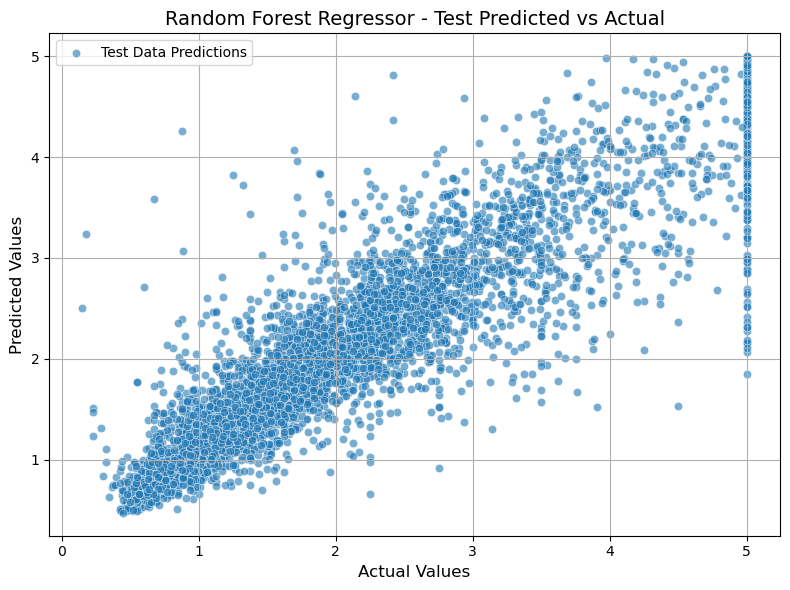

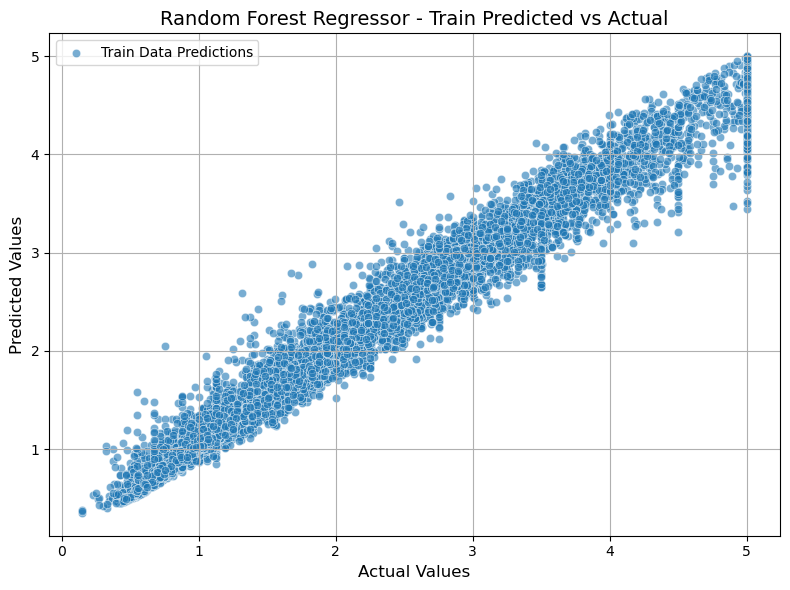

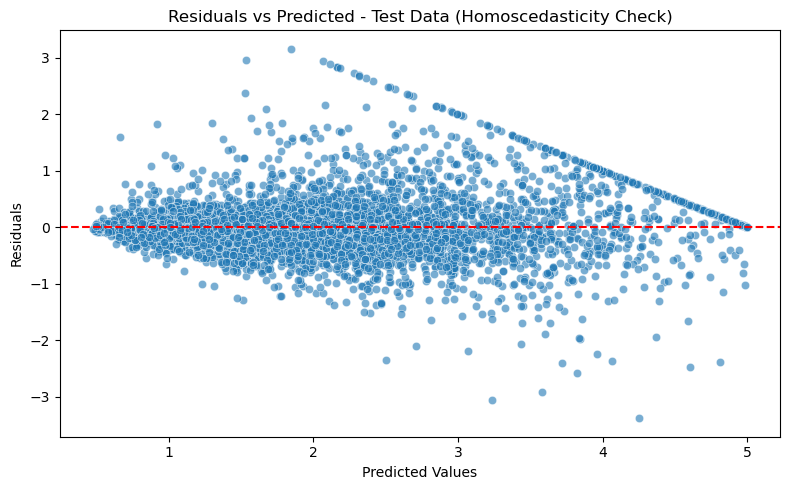

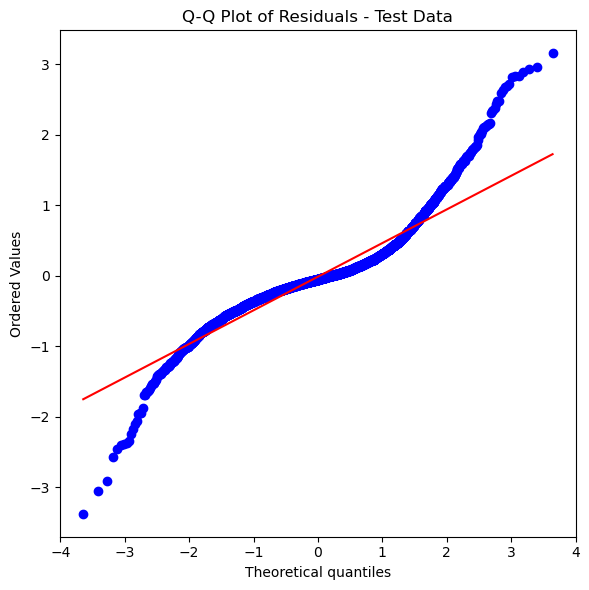

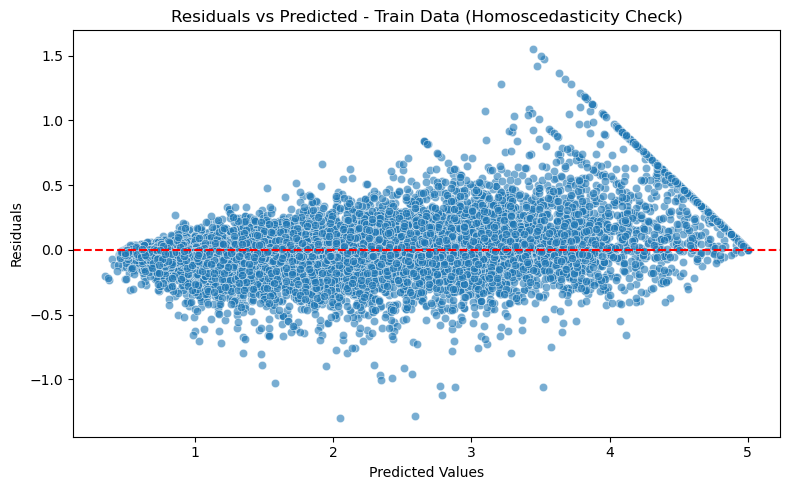

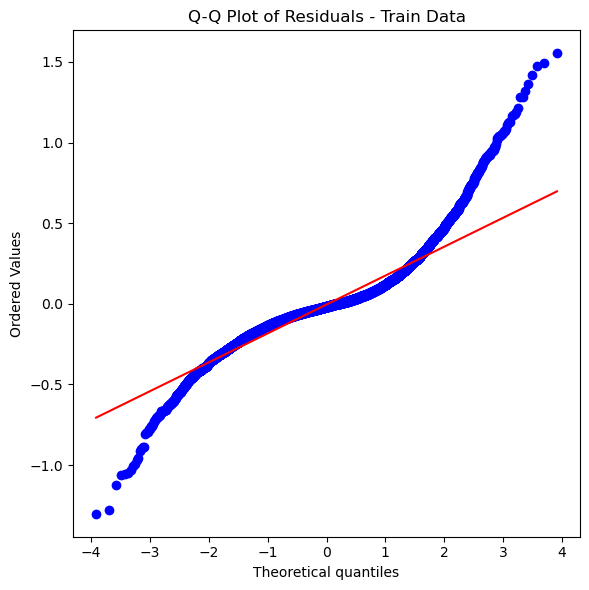

✅ Random Forest Regressor just beat previous best (Baseline Model) → R²: -0.0002 → 0.8069
————————————————————————————————————————————————————————————————————————————————

🔧 Training: Decision Tree Regressor


DecisionTreeRegressor()

Evaluation for Decision Tree Regressor:
🔧 Train Performance
R²: 1.000 → Explains 100% of variation in target
Adjusted R²: 1.000
MAPE: 0.00% → On average, we're off by this percentage
MAE: 0.00 → On average, we're off by ±$0
RMSE: 0.00 → Penalizes big misses more heavily

🧪 Test Performance
R²: 0.593 → Explains 59% of variation in target
Adjusted R²: 0.593
MAPE: 26.19% → On average, we're off by this percentage
MAE: 0.47 → On average, we're off by ±$46948
RMSE: 0.73 → Penalizes big misses more heavily


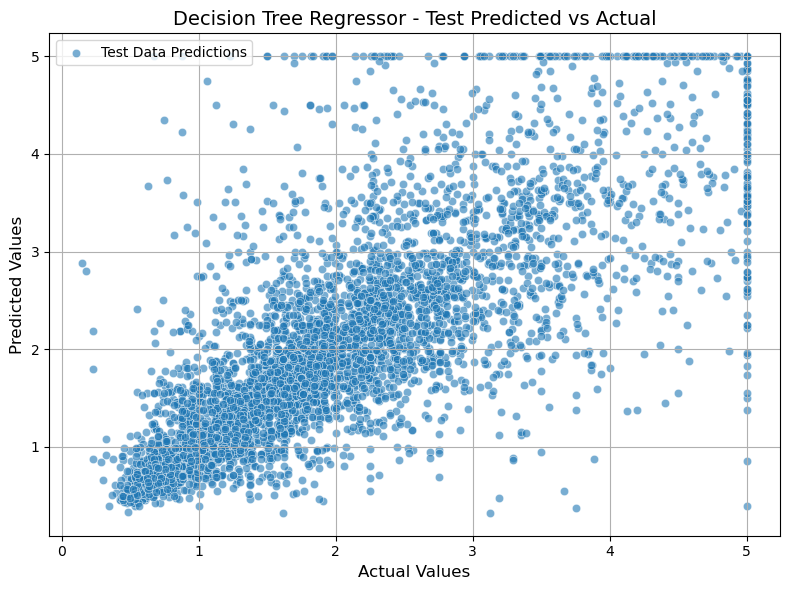

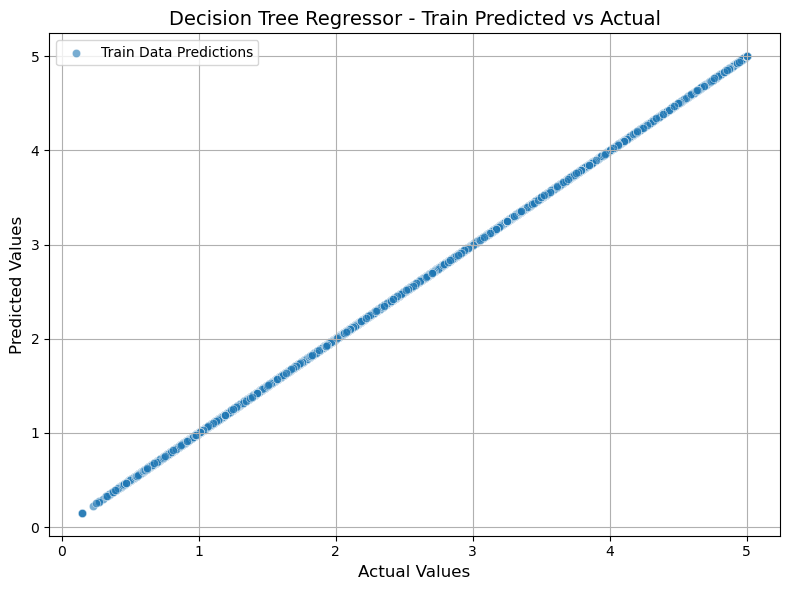

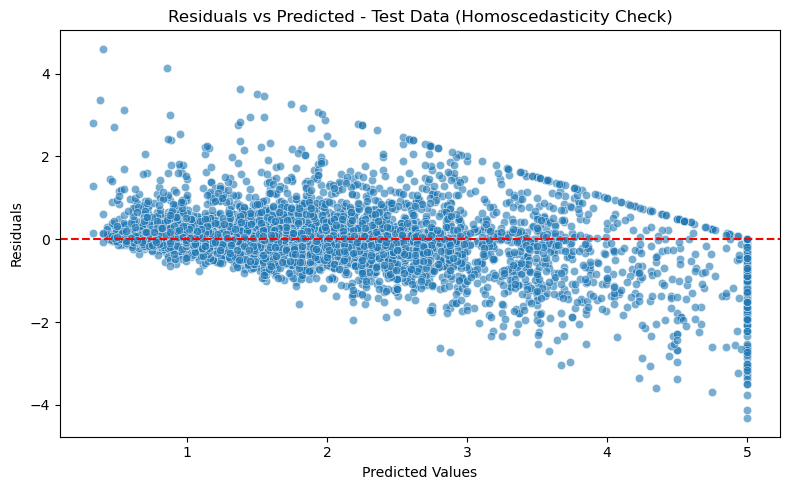

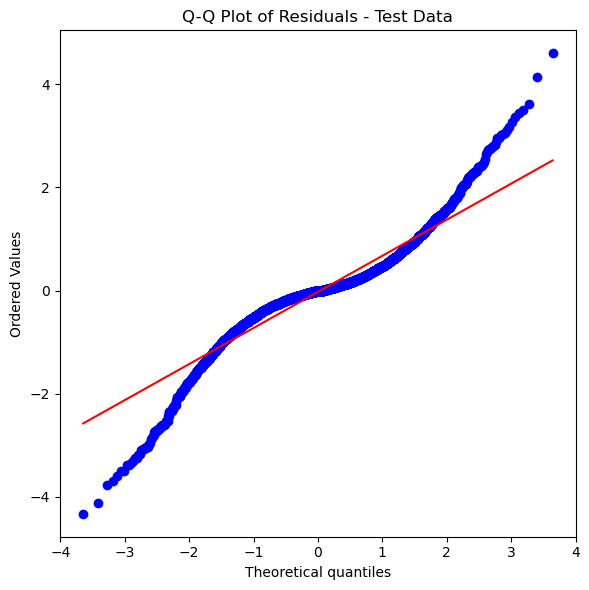

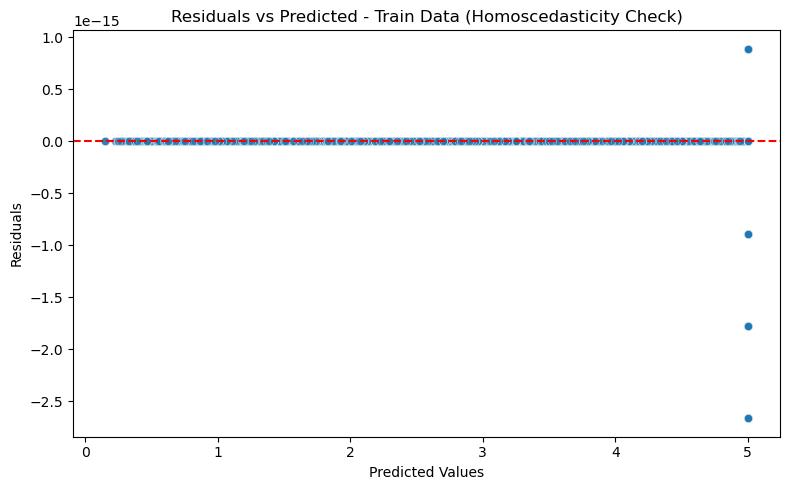

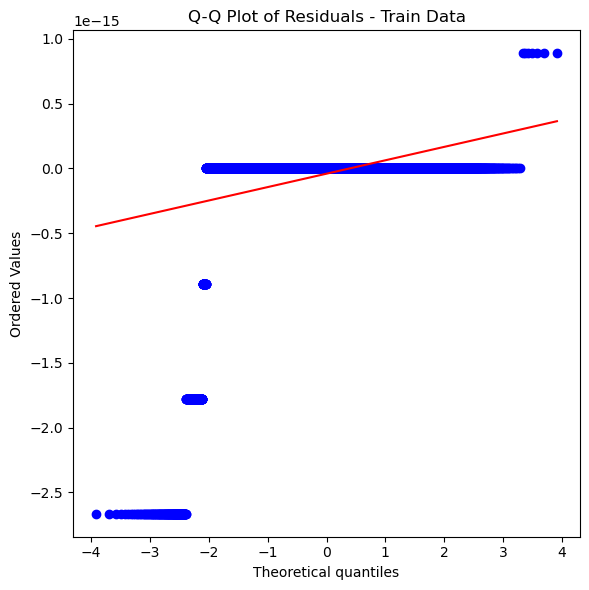

————————————————————————————————————————————————————————————————————————————————

🔧 Training: XGBoost


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation for XGBoost:
🔧 Train Performance
R²: 0.947 → Explains 95% of variation in target
Adjusted R²: 0.947
MAPE: 10.80% → On average, we're off by this percentage
MAE: 0.19 → On average, we're off by ±$18888
RMSE: 0.27 → Penalizes big misses more heavily

🧪 Test Performance
R²: 0.837 → Explains 84% of variation in target
Adjusted R²: 0.836
MAPE: 17.66% → On average, we're off by this percentage
MAE: 0.31 → On average, we're off by ±$30543
RMSE: 0.46 → Penalizes big misses more heavily


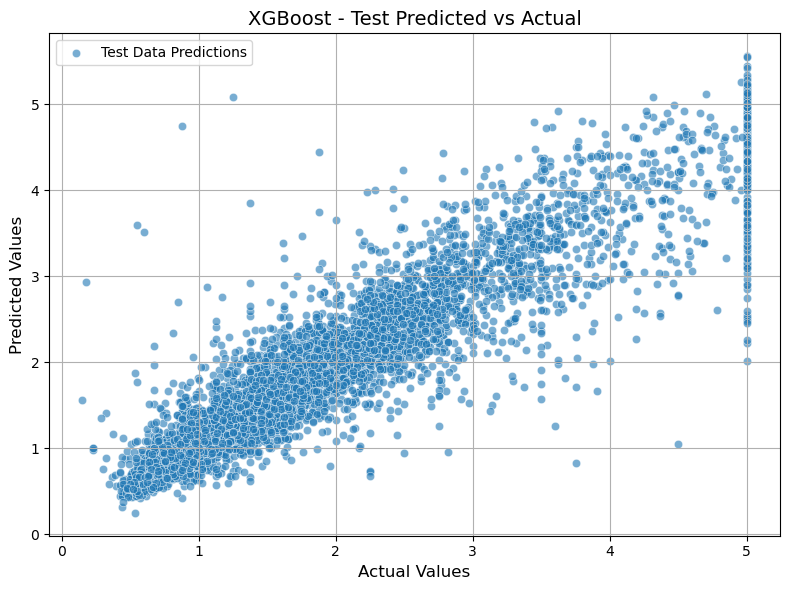

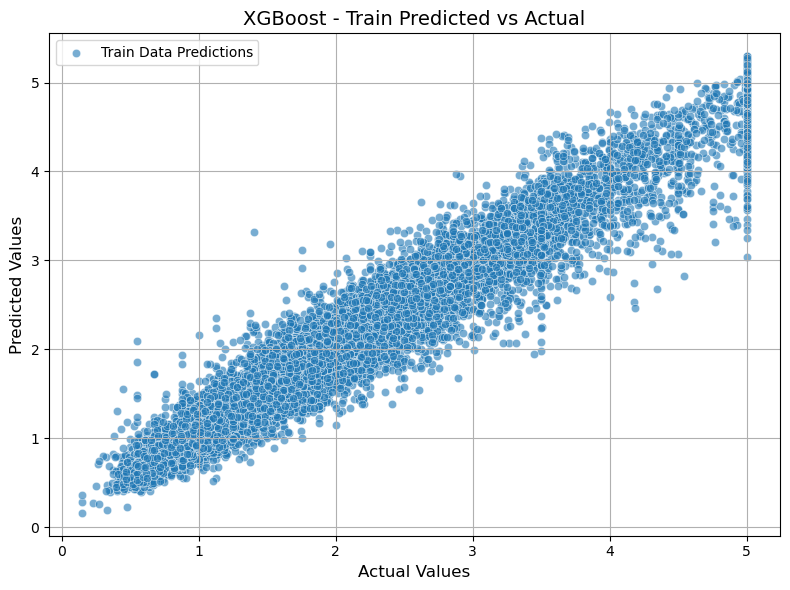

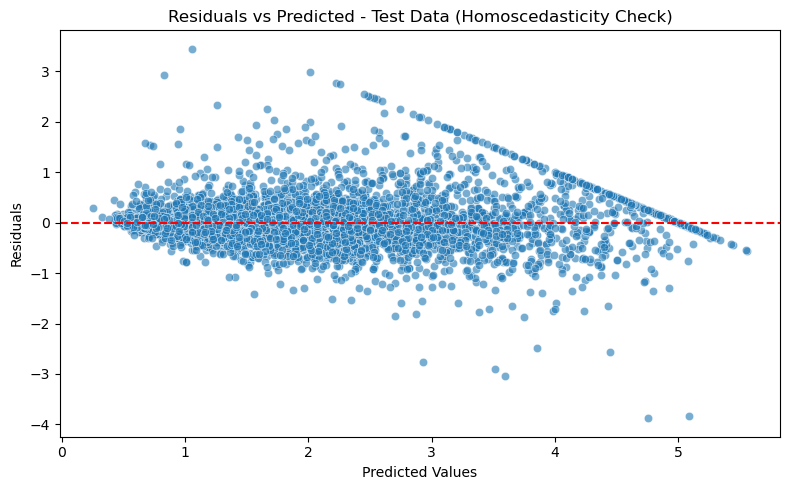

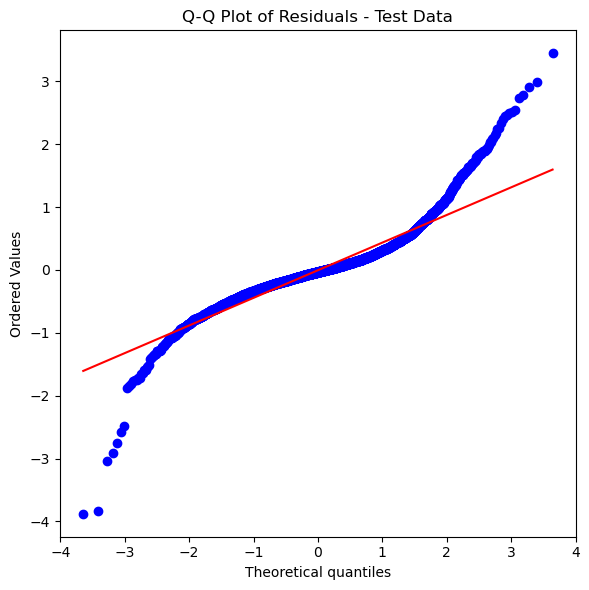

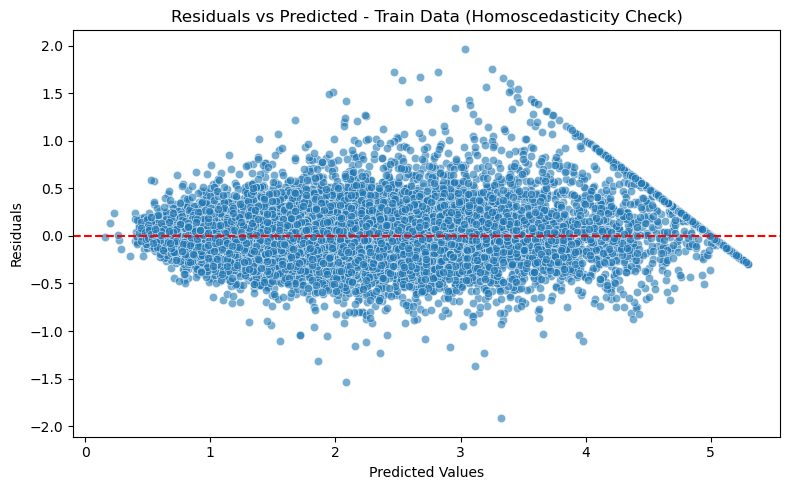

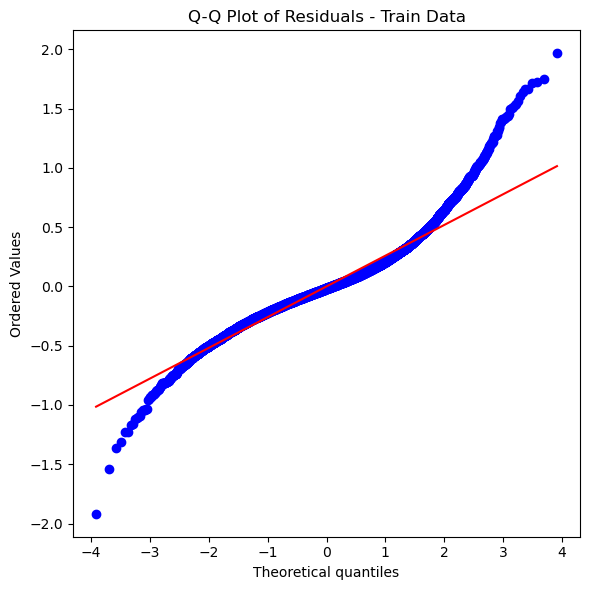

✅ XGBoost just beat previous best (Random Forest Regressor) → R²: 0.8069 → 0.8367
————————————————————————————————————————————————————————————————————————————————


In [47]:
top_k = 3
for name in list(model_registry.keys())[:top_k][::-1]:
    # We evaluate only the top 3 recommended models (ranked earlier) for focused comparison.
    print(f"\n🔧 Training: {name}")

    # Fit and predict
    model = model_registry[name]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation summary using existing functions
    print(f"Evaluation for {name}:")

    # Evaluation Metrics (reuse your function)
    evaluate_model_performance(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

    # Predicted vs Actual (reuse your function)
    plot_predicted_vs_actual(y_test, y_test_pred, title=f"{name} - Test Predicted vs Actual", data_type="Test Data")
    plot_predicted_vs_actual(y_train, y_train_pred, title=f"{name} - Train Predicted vs Actual", data_type="Train Data")

    # Residual Plot (reuse your function)
    plot_residuals_vs_predicted(y_test, y_test_pred, label="Test Data", plot_qq=True)
    plot_residuals_vs_predicted(y_train, y_train_pred, label="Train Data", plot_qq=True)

    # Track and log best model
    update_best_model_info(
        model_name=name,
        model_obj=model,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred
    )

    print("—" * 80)  # horizontal line


In [48]:
# Print current best model based on regression metric (e.g., R², MSE, MAE)
print(f"\n🏆 Best model so far: {best_model_info['name']} "
      f"({success_metric.upper()} = {best_model_info['metrics']['test'][success_metric]:.4f})")

print(f"\n📊 Model Ranking by {success_metric.upper()}:\n")
ranked = sorted(
    model_results.items(),
    key=lambda x: x[1]["metrics"]["test"][success_metric],
    reverse=True
)

for i, (name, result) in enumerate(ranked, 1):
    score = result["metrics"]["test"][success_metric]
    print(f"{i}. {name:<30} {success_metric}: {score:.4f}")



🏆 Best model so far: XGBoost (R2 = 0.8367)

📊 Model Ranking by R2:

1. XGBoost                        r2: 0.8367
2. Random Forest Regressor        r2: 0.8069
3. Decision Tree Regressor        r2: 0.5932
4. Baseline Model                 r2: -0.0002


In [50]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Extract test metrics for regression
df_results = pd.DataFrame({
    model_name: data["metrics"]["test"]
    for model_name, data in model_results.items()
}).T

# Metrics you'd like to plot for regression
desired_metrics = ['r2', 'adjusted_r2', 'mse', 'rmse', 'mae', 'mape']

# Filter only those that exist in df_results
metrics = [m for m in desired_metrics if m in df_results.columns]

# Create subplot layout
rows = (len(metrics) + 1) // 2
fig = sp.make_subplots(rows=rows, cols=2, subplot_titles=[m.upper() for m in metrics])

# Plot each available metric
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    fig.add_trace(
        go.Bar(
            x=df_results.index,
            y=df_results[metric],
            name=metric,
            text=pd.to_numeric(df_results[metric], errors="coerce").round(3),
            textposition="auto"
        ),
        row=row+1, col=col+1
    )

fig.update_layout(
    height=300 * rows,
    width=1000,
    title_text="Model Comparison by Regression Metrics",
    showlegend=False
)

# Suppress intermediate output
fig.show();  # Add semicolon here to suppress intermediate output




<a id="feature-importance"></a>
#### 📊 Feature Importance

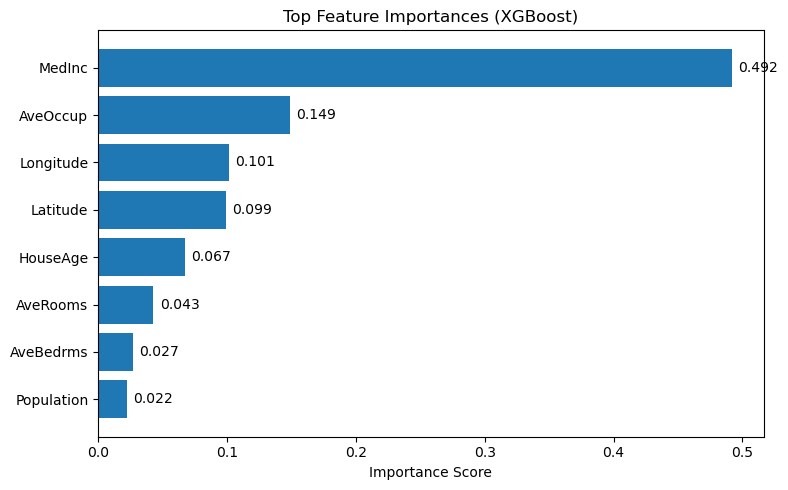

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model=None, feature_names=None, top_n=10, model_name=None):
    """
    Plots top N feature importances for regression models.
    Defaults to best_model_info['model'] unless overridden.
    Optionally takes a model_name for the plot title.
    """
    if model is None:
        model = best_model_info["model"]
        model_name = best_model_info.get("name", "Best Model") if model_name is None else model_name
    else:
        model_name = model_name or "Selected Model"

    if feature_names is None:
        feature_names = X_train.columns

    if hasattr(model, "feature_importances_"):  # For tree-based models like Random Forest or XGBoost
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):  # For linear models like Linear Regression, Lasso, Ridge
        importance = model.coef_
    else:
        raise ValueError("Model does not support feature importances or coefficients")

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False).head(top_n)

    plt.figure(figsize=(8, 5))
    plt.barh(importance_df["Feature"][::-1], importance_df["Importance"][::-1])
    for i, (feature, importance) in enumerate(zip(importance_df["Feature"][::-1], importance_df["Importance"][::-1])):
        plt.text(importance + 0.005, i, f"{importance:.3f}", va='center')
    plt.title(f"Top Feature Importances ({model_name})")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

    return list(importance_df["Feature"])

# ✅ Default: plot for best model
imp_ranked = plot_feature_importance()

# 🛠️ Optional: override model + title
# alt_model = model_results["Random Forest"]["model"]
# imp_ranked = plot_feature_importance(model=alt_model, model_name="Random Forest")


<a id="shap-values"></a>
#### 🧬 SHAP Values

/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning:

[17:22:06] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



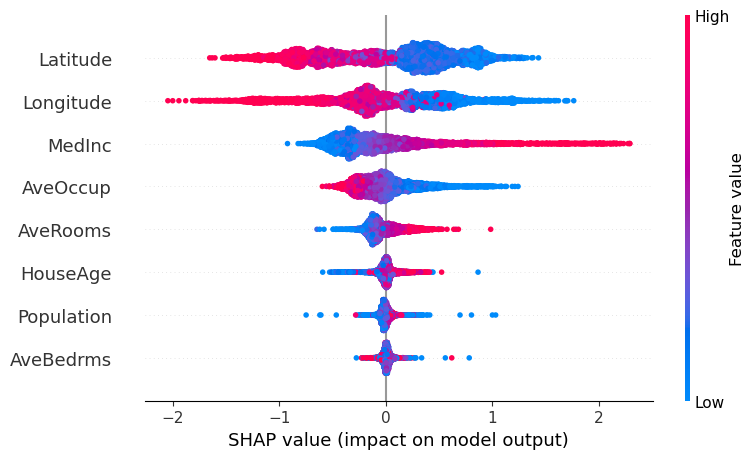


📌 SHAP Summary for XGBoost:
- Each bar shows how much that feature influences the model’s prediction.
- Features at the top are the most impactful across all predictions.
- Blue/red indicate direction: does the feature push the prediction up or down?
- Helps us understand *why* the model predicts a certain value — not just *what* it predicts.


In [53]:
import shap
import numpy as np
import pandas as pd

def plot_shap_summary_tree(model=None, X=None, model_name=None):
    """
    Plot SHAP summary for tree-based regression models (RandomForestRegressor, XGBoost).
    Defaults to best_model_info['model'] and X_test.
    """
    if model is None:
        model = best_model_info["model"]
        model_name = model_name or best_model_info.get("name", "Best Model")
    else:
        model_name = model_name or "Selected Model"

    if X is None:
        X = X_test

    # Use SHAP TreeExplainer for tree-based models
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # SHAP values for regression are continuous, so no need to index for binary classification
    shap.summary_plot(shap_values, X)

    print(f"\n📌 SHAP Summary for {model_name}:")
    print("- Each bar shows how much that feature influences the model’s prediction.")
    print("- Features at the top are the most impactful across all predictions.")
    print("- Blue/red indicate direction: does the feature push the prediction up or down?")
    print("- Helps us understand *why* the model predicts a certain value — not just *what* it predicts.")

    # Calculate the mean absolute SHAP values for each feature to rank them
    shap_df = pd.DataFrame(np.abs(shap_values), columns=X.columns).mean().sort_values(ascending=False)
    
    # Return the ranked feature names based on SHAP importance
    return list(shap_df.index)

# ✅ Default: SHAP for best model
shap_ranked = plot_shap_summary_tree()

# 🛠️ Optional: SHAP for any other model
# alt_model = model_results["Random Forest Regressor"]["model"]
# shap_ranked = plot_shap_summary_tree_regression(model=alt_model, model_name="Random Forest Regressor")


[Back to the top](#table-of-contents)
___

<a id="hyperparameter-tuning"></a>
# 🎯 Fine Tune

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Hyperparameters** are settings you choose *before* training a model (e.g., how much regularization to apply).
- Unlike model coefficients, hyperparameters aren’t learned from the data — they need to be **tuned** manually or via search.
- In regularized models:
  - `alpha` controls how strong the penalty is
  - A small alpha behaves like linear regression
  - A large alpha shrinks everything too much → underfit

**Why tune?**
- Tuning finds the **best tradeoff** between bias and variance
- Prevents both **underfitting** and **overfitting**
- Improves model generalization on unseen data

You typically use:
- **GridSearchCV**: Tries every combo of values (good for small grids)
- **RandomizedSearchCV**: Tries random combos (faster for large grids)

</details>


<a id="feature-selection-rfe"></a>
#### 🧪 Feature Selection – RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def perform_rfe(model, X_train, y_train, n_features_to_select=None):
    """
    Perform Recursive Feature Elimination (RFE) for feature selection.
    
    Parameters:
    - model: The regression model to use (e.g., RandomForestRegressor, LinearRegression).
    - X_train: Training data (features).
    - y_train: Training data (target variable).
    - n_features_to_select: Number of features to select. If None, it will select all features.

    Returns:
    - selected_features: List of selected features based on RFE.
    """
    # Initialize RFE with the model and number of features to select
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    
    # Fit RFE on training data
    rfe.fit(X_train, y_train)
    
    # Get the mask of selected features
    selected_features = X_train.columns[rfe.support_]
    
    # Return the selected features and their ranking
    return selected_features


if False:
    # Pass the best model stored programmatically
    best_model = best_model_info["model"]  # Assuming best_model_info holds the best model

    # Optionally, you can pass an alternative model from model_results or any other model
    # alt_model = model_results["Random Forest Regressor"]["model"]  # Uncomment to use a different model

    # Perform RFE with the best model
    selected_features = perform_rfe(best_model, X_train, y_train, n_features_to_select=5)

    # Print the selected features
    print(f"Selected Features: {selected_features}")

    # Uncomment below to use an alternative model if needed
    # selected_features_alt_model = perform_rfe(alt_model, X_train, y_train, n_features_to_select=5)
    # print(f"Selected Features with Alternative Model: {selected_features_alt_model}")


Selected Features: Index(['MedInc', 'HouseAge', 'AveOccup', 'Latitude', 'Longitude'], dtype='object')


<a id="feature-selection-rfe-shap"></a>
#### 🧪 Feature Selection – RFE + SHAP

In [55]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import numpy as np

def shap_guided_backward_elimination(
    model=None, X=None, y=None,
    shap_ranked=None,
    metric_name=None,
    drop_threshold=0.005,
    min_features=1,
    verbose=True
):
    """
    SHAP-guided backward elimination with early stopping for prediction tasks.
    Drops features by SHAP rank until performance drops significantly or hits min_features.
    """
    # Use the best model stored programmatically by default
    model_base = clone(model or best_model_info["model"])
    X_curr = X.copy()

    # Determine the evaluation metric
    metric_name = metric_name or "r2"  # Default to R²
    metric_func = {
        "r2": r2_score,
        "mse": mean_squared_error,
        "mae": mean_absolute_error
    }.get(metric_name)

    if metric_func is None:
        raise ValueError(f"Unsupported metric: {metric_name}")

    # Get SHAP-ranked features if not provided
    if shap_ranked is None:
        explainer = shap.TreeExplainer(model_base.fit(X_curr, y))
        shap_values = explainer.shap_values(X_curr)
        shap_importance = np.abs(shap_values).mean(axis=0)
        shap_ranked = X_curr.columns[np.argsort(shap_importance)[::-1]].tolist()
    else:
        shap_ranked = shap_ranked.copy()

    # Initialize tracking variables
    score_history = []
    previous_score = None

    # Backward feature elimination loop
    while len(shap_ranked) >= min_features:
        model = clone(model_base)
        model.fit(X_curr[shap_ranked], y)
        y_pred = model.predict(X_curr[shap_ranked])
        score = metric_func(y, y_pred)
        score_history.append((len(shap_ranked), score, shap_ranked.copy()))

        if verbose:
            feat_list = ", ".join(shap_ranked)
            print(f"✅ {len(shap_ranked)} features → {metric_name}: {score:.4f} → [{feat_list}]")

        # Early stop if score drops significantly
        if previous_score is not None and (previous_score - score) > drop_threshold:
            if verbose:
                print(f"🛑 Stopping early: {metric_name} dropped from {previous_score:.4f} to {score:.4f}")
            break

        previous_score = score
        shap_ranked.pop()  # Drop the least important SHAP feature

    if not score_history:
        raise ValueError("No elimination steps executed — shap_ranked too short or invalid inputs.")

    # Best configuration
    tolerance = 0.01  # Accept within 1% drop of best score
    best_score = max(score_history, key=lambda x: x[1])[1]
    # Keep all configurations that are within tolerance
    candidates = [cfg for cfg in score_history if (best_score - cfg[1]) <= tolerance]
    # Pick the configuration with the fewest features
    best_config = min(candidates, key=lambda x: x[0])

    print(f"\n🎯 Best config: {len(best_config[2])} features → {metric_name}: {best_config[1]:.4f}")
    return best_config[2], score_history


# Example usage:  
# Use the best model from the programmatically stored best_model_info
best_model = best_model_info["model"]  # This gets the best model programmatically stored

# Optionally, pass an alternative model by uncommenting the following line
# alt_model = model_results["Random Forest Regressor"]["model"]  # Use a different model if desired

# Run the SHAP-guided backward elimination for feature selection
selected_features, score_history = shap_guided_backward_elimination(
    model=best_model, X=X_train, y=y_train, metric_name="r2", drop_threshold=0.01, min_features=1
)

# Uncomment below to use an alternative model if needed
# selected_features_alt_model, score_history_alt = shap_guided_backward_elimination(
#     model=alt_model, X=X_train, y=y_train, metric_name="r2", drop_threshold=0.01, min_features=1
# )

print(f"Selected Features: {selected_features}")


/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning:

[17:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



✅ 8 features → r2: 0.9469 → [Latitude, Longitude, MedInc, AveOccup, AveRooms, HouseAge, Population, AveBedrms]
✅ 7 features → r2: 0.9441 → [Latitude, Longitude, MedInc, AveOccup, AveRooms, HouseAge, Population]
✅ 6 features → r2: 0.9412 → [Latitude, Longitude, MedInc, AveOccup, AveRooms, HouseAge]
✅ 5 features → r2: 0.9336 → [Latitude, Longitude, MedInc, AveOccup, AveRooms]
✅ 4 features → r2: 0.9238 → [Latitude, Longitude, MedInc, AveOccup]
✅ 3 features → r2: 0.9072 → [Latitude, Longitude, MedInc]
🛑 Stopping early: r2 dropped from 0.9238 to 0.9072

🎯 Best config: 6 features → r2: 0.9412
Selected Features: ['Latitude', 'Longitude', 'MedInc', 'AveOccup', 'AveRooms', 'HouseAge']


<a id="gridsearch-linear"></a>
#### 🧪 Grid Search

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Grid Search** is a brute-force method: it tries **every combination** of specified hyperparameters.
- For each combination:
  1. The model is trained using cross-validation (e.g., 5-fold).
  2. Performance is averaged across folds.
- The best parameter set is chosen based on the scoring metric (e.g., R²).

**Example:**
If you provide 2 values for `fit_intercept` and 2 values for `positive`, it will train 4 separate models and compare their performance.

💡 It’s exhaustive, but gets expensive as the number of hyperparameters or grid size increases.

</details>


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import numpy as np

# Define param grid for prediction models (similar to classification)
param_grids = {
    "LinearRegression": {
        "fit_intercept": [True, False],
        "normalize": [True, False]  # deprecated in newer versions of scikit-learn, but included for older compatibility
    },
    "Ridge": {
        "alpha": [0.1, 1, 10],  # regularization strength
        "solver": ["auto", "svd", "cholesky", "lsqr"]
    },
    "Lasso": {
        "alpha": [0.1, 1, 10],
        "max_iter": [1000, 5000]
    },
    "ElasticNet": {
        "alpha": [0.1, 1, 10],
        "l1_ratio": [0.1, 0.5, 0.9]
    },
    "RandomForestRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "DecisionTreeRegressor": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "criterion": ["mse", "friedman_mse"]
    },
    "XGBRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    },
    "KNeighborsRegressor": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
}

In [63]:
# ⚙️ Resolve model name and corresponding grid
model_name = best_model_info["model"].__class__.__name__  # Use the best model stored programmatically
param_grid = param_grids.get(model_name)

if param_grid is None:
    raise ValueError(f"No param grid defined for model: {model_name}")

print(f"\n🔧 Running Grid Search for: {model_name}")

# 🧪 Run Grid Search
model_instance = best_model_info["model"].__class__()

grid_search = GridSearchCV(
    estimator=model_instance,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Use MSE for regression scoring
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_tuned_model = grid_search.best_estimator_

print("✅ Best Parameters Found:")
print(grid_search.best_params_)


🔧 Running Grid Search for: XGBRegressor
Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

✅ Best Parameters Found:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


🔧 Train Performance
R²: 0.958 → Explains 96% of variation in target
Adjusted R²: 0.958
MAPE: 9.47% → On average, we're off by this percentage
MAE: 0.17 → On average, we're off by ±$16579
RMSE: 0.24 → Penalizes big misses more heavily

🧪 Test Performance
R²: 0.849 → Explains 85% of variation in target
Adjusted R²: 0.849
MAPE: 17.13% → On average, we're off by this percentage
MAE: 0.30 → On average, we're off by ±$29608
RMSE: 0.45 → Penalizes big misses more heavily


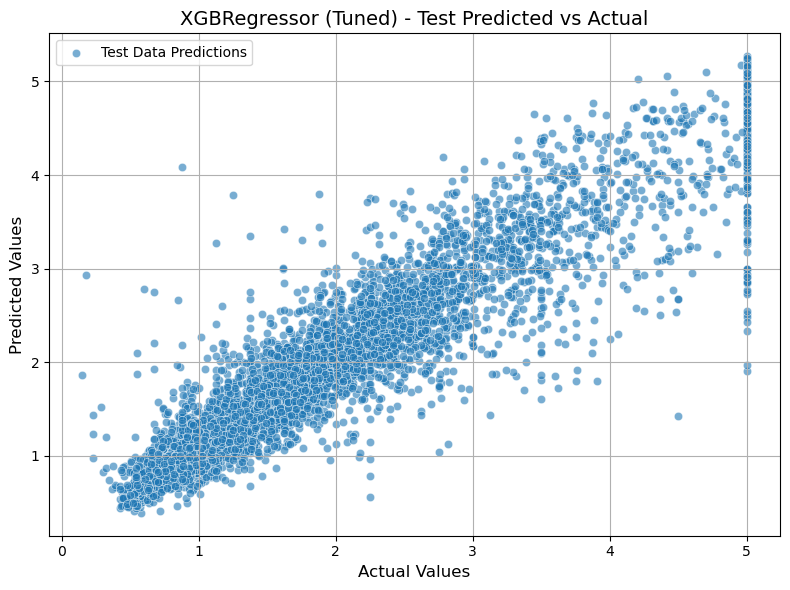

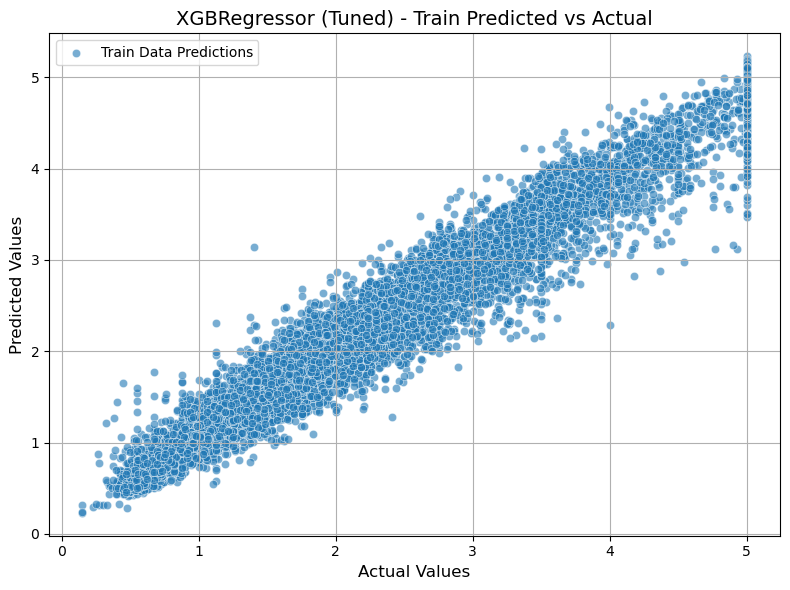

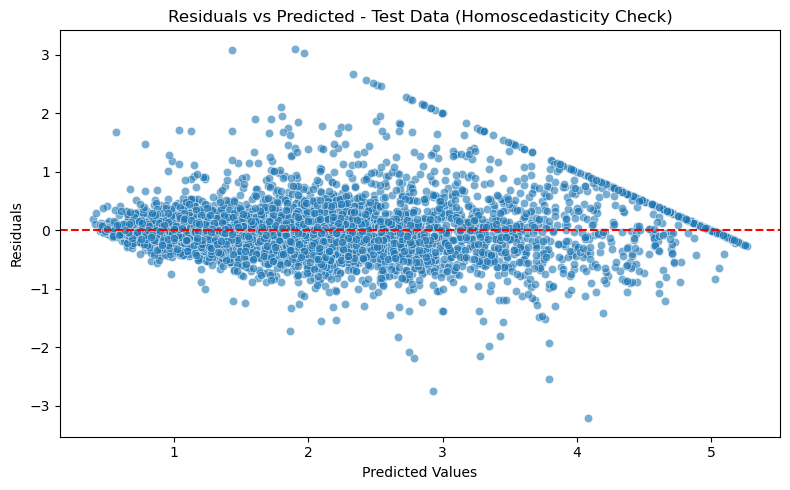

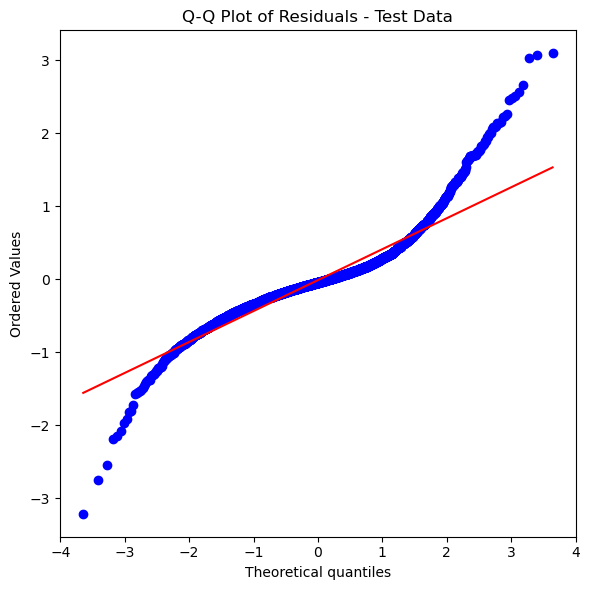

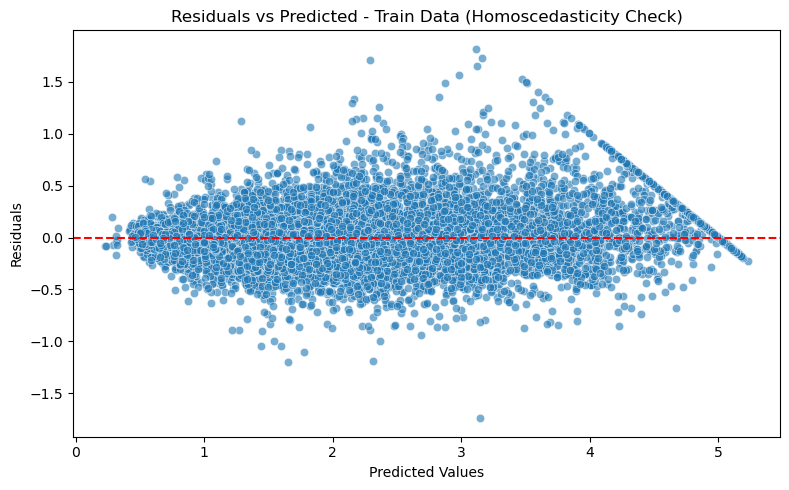

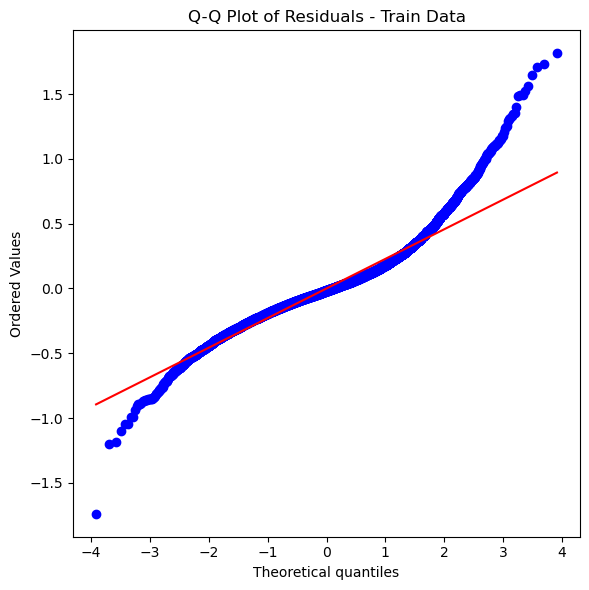


📊 Model — Performance Summary:
- R²          :    0.85 → Explains the variance of the target.
- Adjusted R² :    0.85
- MAPE        :   17.13% → On average, we're off by this percentage.
- MAE         :    0.30 → On average, we're off by ±$29608
- RMSE        :    0.45 → Penalizes large misses more heavily.

📌 Interpretation:
- High MAPE → model might need improvement.
- MAE is acceptable; the model is performing well.
- RMSE is acceptable; model is not penalizing large errors excessively.
- R² indicates model fit: 0.85


In [67]:
# 📈 Evaluate tuned model using the existing functions

# Predictions
y_test_pred = best_tuned_model.predict(X_test)
y_train_pred = best_tuned_model.predict(X_train)

# Use the existing `evaluate_model_performance` function for model evaluation
evaluate_model_performance(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)

# Plot Predicted vs Actual (reuse the existing function for this)
plot_predicted_vs_actual(y_test, y_test_pred, title=f"{model_name} (Tuned) - Test Predicted vs Actual", data_type="Test Data")
plot_predicted_vs_actual(y_train, y_train_pred, title=f"{model_name} (Tuned) - Train Predicted vs Actual", data_type="Train Data")

# Plot Residuals vs Predicted (reuse your existing function for residuals vs predicted)
plot_residuals_vs_predicted(y_test, y_test_pred, label="Test Data", plot_qq=True)
plot_residuals_vs_predicted(y_train, y_train_pred, label="Train Data", plot_qq=True)

# Add to model_results with a new key (using prediction metrics)
model_results[f"{model_name} (Tuned)"] = {
    "model": best_tuned_model,
    "mse": mean_squared_error(y_test, y_test_pred),
    "rmse": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "mae": mean_absolute_error(y_test, y_test_pred),
    "r2": r2_score(y_test, y_test_pred)
}

# Evaluation summary (using the existing evaluation function)
evaluate_regression_model(y_test, y_test_pred)  # Removed 'model_name' argument


<a id="randomsearch-regularized"></a>
#### 🎲 Random Search

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Randomized Search** picks **random combinations** of hyperparameters from defined distributions.
- Instead of trying every possibility, it samples `n_iter` times and evaluates those.

**How it works:**
- You define a **distribution** (e.g., uniform or log-uniform) for each parameter.
- For each iteration:
  1. A random value is drawn from each distribution.
  2. The model is trained and scored via cross-validation.
- After all iterations, the best-performing combination is selected.

💡 It’s much faster than Grid Search for large parameter spaces and often finds good results with fewer trials.

</details>



🎲 Running Randomized Search for: XGBRegressor
Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

✅ Best Parameters Found:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
🔧 Train Performance
R²: 0.958 → Explains 96% of variation in target
Adjusted R²: 0.958
MAPE: 9.47% → On average, we're off by this percentage
MAE: 0.17 → On average, we're off by ±$16579
RMSE: 0.24 → Penalizes big misses more heavily

🧪 Test Performance
R²: 0.835 → Explains 84% of variation in target
Adjusted R²: 0.835
MAPE: 18.06% → On average, we're off by this percentage
MAE: 0.31 → On average, we're off by ±$31078
RMSE: 0.47 → Penalizes big misses more heavily


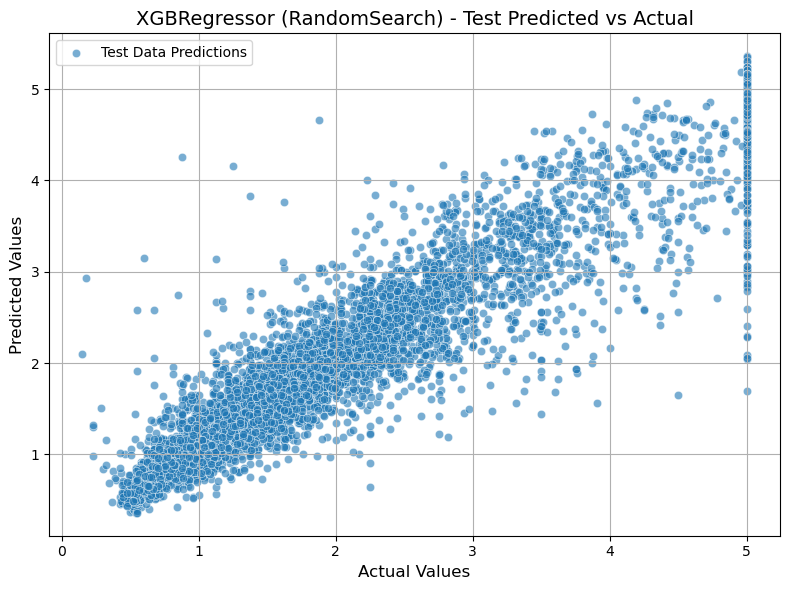

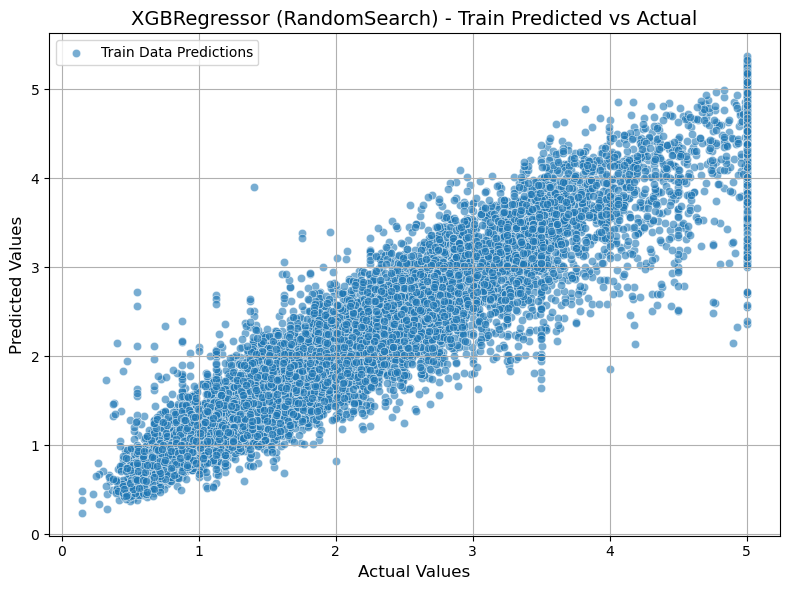

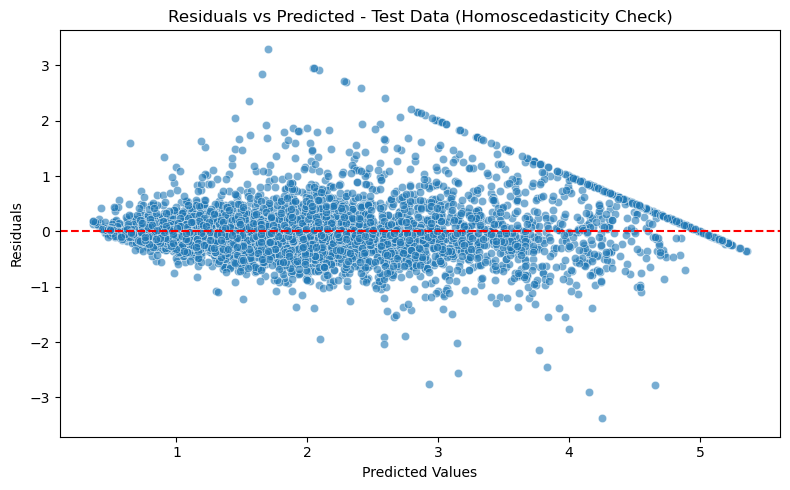

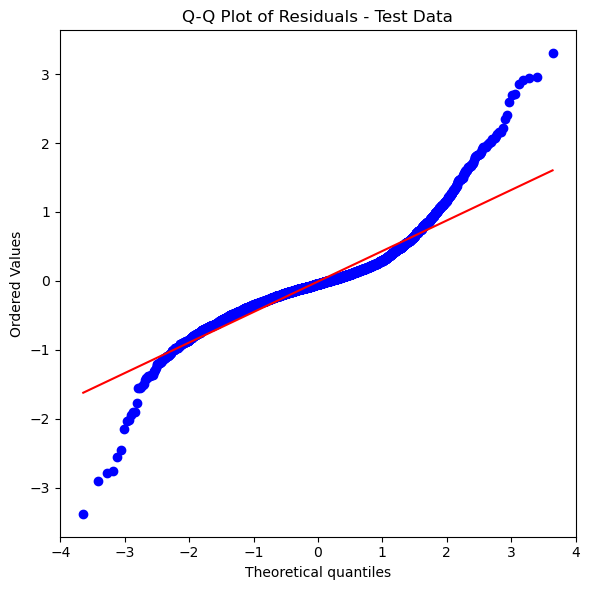

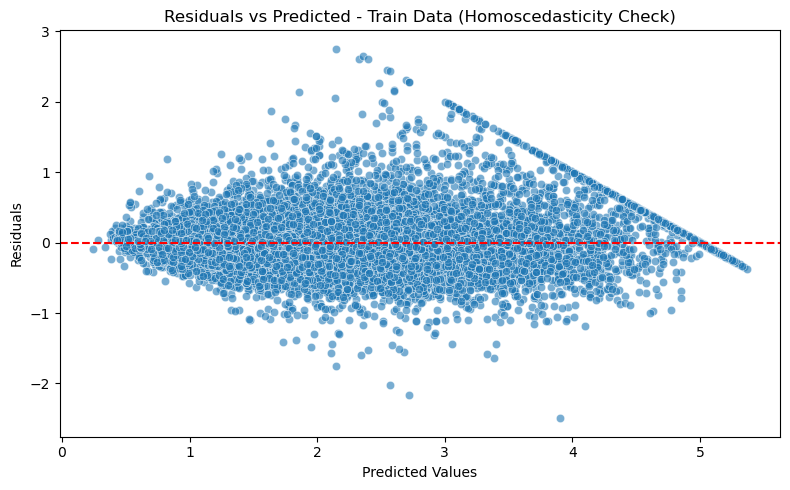

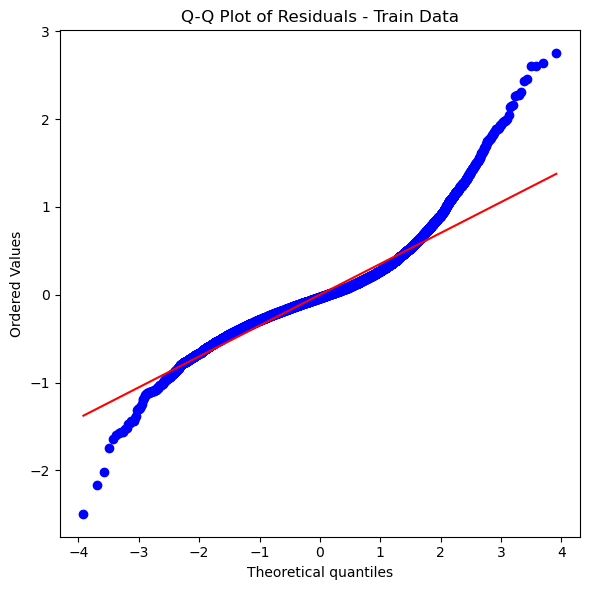


📊 Evaluation for XGBRegressor (RandomSearch):
  R²: 0.8354
  RMSE: 0.4667
  MAE: 0.3108
  MSE: 0.2178


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔁 Use same param grid as defined earlier
model_name = best_model_info["model"].__class__.__name__
param_dist = param_grids.get(model_name)

if param_dist is None:
    raise ValueError(f"No param distribution defined for model: {model_name}")

print(f"\n🎲 Running Randomized Search for: {model_name}")

# Create a new instance of the model
model_instance = best_model_info["model"].__class__()

# 🔍 Run randomized search
random_search = RandomizedSearchCV(
    estimator=model_instance,
    param_distributions=param_dist,
    n_iter=15,
    scoring="neg_mean_squared_error",  # Use MSE or any other regression metric
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_

print("✅ Best Parameters Found:")
print(random_search.best_params_)

# 🔎 Evaluate tuned model
y_test_pred = best_random_model.predict(X_test)

# Metrics for regression (prediction)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Store results
model_results[f"{model_name} (RandomSearch)"] = {
    "model": best_random_model,
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}

# Visual eval using existing functions
evaluate_model_performance(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)  # Update if required with correct arguments
plot_predicted_vs_actual(y_test, y_test_pred, title=f"{model_name} (RandomSearch) - Test Predicted vs Actual", data_type="Test Data")
plot_predicted_vs_actual(y_train, best_random_model.predict(X_train), title=f"{model_name} (RandomSearch) - Train Predicted vs Actual", data_type="Train Data")
plot_residuals_vs_predicted(y_test, y_test_pred, label="Test Data", plot_qq=True)
plot_residuals_vs_predicted(y_train, best_random_model.predict(X_train), label="Train Data", plot_qq=True)

# Print evaluation metrics (already covered by evaluate_model_performance)
print(f"\n📊 Evaluation for {model_name} (RandomSearch):")
print(f"  R²: {r2:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")


[Back to the top](#table-of-contents)
___



<a id="ensemble-methods"></a>
# 📦 Ensemble Methods

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Ensemble methods** combine multiple models to make more robust and accurate predictions than any single model could alone.

##### 💡 Why ensemble?
- Single models can be biased, noisy, or fragile.
- Ensembling reduces variance, balances out individual model weaknesses, and improves generalization.

##### 🧰 Types of Ensembling:

1. **Bagging (Bootstrap Aggregating):**
   - Trains multiple models on different random subsets of the data.
   - Predictions are averaged (for regression) or voted (for classification).
   - **Example**: Random Forest.

2. **Boosting:**
   - Trains models **sequentially**, where each new model tries to fix the errors of the previous ones.
   - Final prediction is a weighted sum of all models.
   - **Examples**: AdaBoost, Gradient Boosting, XGBoost.

3. **Stacking:**
   - Trains multiple different models and combines their outputs using a **meta-model**.
   - The meta-model learns to weigh or blend base model predictions.
   - Often more powerful, but also more complex.

##### 📈 Bottom Line:
> Ensemble models trade off interpretability for performance — they usually win on accuracy.

</details>


<a id="bagging"></a>
#### 🪵 Bagging (Random Forest Regressor)

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is Bagging?

- **Bagging** (Bootstrap Aggregating) is an ensemble method that trains multiple models on random subsets of the data (with replacement).
- Each model is trained independently.
- The final prediction is the **average** of all predictions (for regression).

##### 🧠 Why use it?

- Bagging reduces **variance** by averaging out model noise.
- It helps stabilize models that tend to overfit — like decision trees.

##### ✅ Good candidates for base models

Bagging works with **any regression model** that supports `.fit(X, y)` and `.predict(X)`. Common choices include:

- **DecisionTreeRegressor**  
  High variance → Bagging helps stabilize it.

- **KNeighborsRegressor**  
  Very sensitive to noise and local patterns — Bagging improves robustness.

- **LinearRegression**  
  Works, but since it's low variance already, Bagging often adds little.

- **SVR (Support Vector Regressor)**  
  Can be used if tuned well. Bagging may reduce sensitivity to outliers.

- **Ridge / Lasso / BayesianRidge**  
  Technically allowed, but already regularized — Bagging rarely adds value.

- **MLPRegressor (Neural Networks)**  
  Possible but computationally heavy. Use with caution.

##### 🌲 Random Forest as an Example

- A **Random Forest Regressor** is a specific type of bagging:
  - Uses decision trees as base models
  - Adds extra randomness by selecting a random subset of features at each split
- But bagging isn’t limited to trees — it can be applied to any model type.

##### ✅ Benefits

- More stable than a single model
- Less sensitive to noise and overfitting
- Easy to parallelize

</details>


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define base estimator — can be swapped out (e.g., DecisionTreeRegressor, LinearRegression, etc.)
base_model = DecisionTreeRegressor()

# Wrap it in a Bagging ensemble
bagging = BaggingRegressor(base_estimator=base_model, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

# Predictions
y_bag_train = bagging.predict(X_train)
y_bag_test = bagging.predict(X_test)

# Evaluation
print("🧺 Bagging Regressor (with Decision Tree)")
print(f"Train R²: {r2_score(y_train, y_bag_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_bag_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_bag_test):.2f}")


<a id="boosting"></a>
#### 🚀 Boosting

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🚀 What is Boosting?

- **Boosting** builds models **sequentially**, not in parallel like Bagging.
- Each new model is trained to fix the **mistakes** made by the previous model.
- The final prediction is a **weighted sum** of all the individual models.

##### 🔁 How it works (simplified):

1. Train the first model on the data.
2. Look at where it did poorly.
3. Train the second model to focus more on those mistakes.
4. Repeat for several rounds.
5. Combine all models (usually by weighted average).

##### 🧠 Why Boosting Works

- It focuses model capacity on the **hardest-to-predict cases**.
- Often gives better performance than bagging, especially on structured/tabular data.
- Reduces both bias and variance.

##### 🔧 Popular Boosting Algorithms

- **AdaBoost**: Adjusts weights of training points.
- **Gradient Boosting**: Fits on the residuals (errors) of the previous model.
- **XGBoost / LightGBM / CatBoost**: Faster, more scalable variants of gradient boosting.

##### ⚠️ Caution

- Boosting is powerful but more prone to overfitting if not tuned carefully.
- Models are sequential — slower to train and harder to parallelize than Bagging.

</details>


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_gbr_train = gbr.predict(X_train)
y_gbr_test = gbr.predict(X_test)

# Evaluation
print("🚀 Gradient Boosting Regressor")
print(f"Train R²: {r2_score(y_train, y_gbr_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_gbr_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_gbr_test):.2f}")


<a id="stacking"></a>
#### 🧠 Stacking (Meta-modeling)

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🔁 How it works:
- **Stacking** combines multiple models by training a **meta-model** to learn how to best combine their predictions.
- Instead of averaging like Bagging or Boosting, it lets a new model decide **how much to trust each base model**.


1. Train several base models (e.g., linear regression, tree, SVR).
2. Use their predictions as **features** to train a new model (the "meta-model").
3. The meta-model learns patterns in the predictions — which base models work better under which conditions.

##### 🧩 Why use Stacking?

- Leverages strengths of diverse models (e.g., tree + linear + neighbors).
- Usually outperforms any single base model — especially when the base models have **different biases**.

##### 📌 Key Points:

- Base models should be **diverse** — combining 3 similar models adds little.
- Cross-validation is usually needed to avoid overfitting from using predicted outputs during training.
- Common meta-models: LinearRegression, Ridge, LogisticRegression (for classification), GradientBoosting.

##### ⚠️ Tradeoff:

> High performance, but slower, harder to debug, and trickier to tune than Bagging/Boosting.

</details>


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# Define base models (can mix different types)
base_models = [
    ("tree", DecisionTreeRegressor(max_depth=5)),
    ("svr", SVR()),
    ("linear", LinearRegression())
]

# Define meta-model (also tunable — RidgeCV here adds internal regularization)
meta_model = RidgeCV()

# Build stacking regressor
stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stacking.fit(X_train, y_train)

# Predictions
y_stack_train = stacking.predict(X_train)
y_stack_test = stacking.predict(X_test)

# Evaluation
print("🧠 Stacking Regressor")
print(f"Train R²: {r2_score(y_train, y_stack_train):.3f}")
print(f"Test  R²: {r2_score(y_test, y_stack_test):.3f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_stack_test):.2f}")


[Back to the top](#table-of-contents)
___

